# SIT742: Modern Data Science
## End Term Assignment - Task 2
### Group Members: Ahmad Aburahma, Amneh Ghanem, Hanan Arar

---
## Part 1: Data Acquisition and Manipulation (Q1.1 - Q1.8)
---

### Question 1.1
Using PySpark to do some data wrangling process, so that:
- 1.1.1 For the none or null in text column, change it to 'no review'.
- 1.1.2 Process the content in time column, and convert the strings from time to yyyy-mm-dd format in the new column as newtime and show the first 5 rows.
#### Answer 1.1

In [36]:
# ============================================
# SIT742 - End Term Assignment
# Part 1 - Question 1.1
# Data Wrangling with PySpark
# ============================================

!pip install pyspark



In [37]:
# Download the dataset from GitHub
!wget https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/business_review_submission.zip -O /content/business_review_submission.zip

# Unzip the downloaded file
import zipfile

zip_path = "/content/business_review_submission.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# After extraction, we will have:
# /content/business_reviews.csv
# /content/business_meta.csv

reviews_path = "/content/business_reviews.csv"

import os

# List extracted files to confirm exact names
for root, dirs, files in os.walk("/content"):
    for f in files:
        if "business" in f.lower():
            print(os.path.join(root, f))


import os

for f in os.listdir("/content"):
    print(f)


--2025-10-01 12:20:17--  https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/business_review_submission.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tulip-lab/sit742/develop/Jupyter/data/business_review_submission.zip [following]
--2025-10-01 12:20:17--  https://raw.githubusercontent.com/tulip-lab/sit742/develop/Jupyter/data/business_review_submission.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36271607 (35M) [application/zip]
Saving to: ‘/content/business_review_submission.zip’

/content/business_r 100%[===================>]  34.59M  42.9MB/s    in 0.8s    

2025-10-01

In [38]:
# Define correct paths after extraction
reviews_path = "/content/review.csv"
meta_path    = "/content/meta-review-business.csv"

# Start Spark session
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, to_date

spark = SparkSession.builder.appName("EndTerm_Q1.1").getOrCreate()

# Load the reviews dataset
df_reviews = spark.read.csv(reviews_path, header=True, inferSchema=True)

# Load the business meta dataset
df_meta = spark.read.csv(meta_path, header=True, inferSchema=True)

print("Schema of the meta dataset:")
df_meta.printSchema()
print(df_meta.head())

print("Schema of the dataset:")
df_reviews.printSchema()
df_reviews.head()

Schema of the meta dataset:
root
 |-- name: string (nullable = true)
 |-- address: string (nullable = true)
 |-- gmap_id: string (nullable = true)
 |-- description: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- category: string (nullable = true)
 |-- avg_rating: string (nullable = true)
 |-- num_of_reviews: string (nullable = true)
 |-- price: string (nullable = true)
 |-- hours: string (nullable = true)
 |-- MISC: string (nullable = true)
 |-- state: string (nullable = true)
 |-- relative_results: string (nullable = true)
 |-- url: string (nullable = true)

Row(name='Bear Creek Cabins & RV Park', address='Bear Creek Cabins & RV Park, 3181 Richardson Hwy, Valdez, AK 99686', gmap_id='0x56b646ed2220b77f:0xd8975e316de80952', description=None, latitude='61.1006437', longitude='-146.21455179999998', category="['RV park', 'Cabin rental agency', 'Campground']", avg_rating='4.5', num_of_reviews='18', price=None, hours=None, MISC=

Row(user_id='1.091298048426862e+20', name='Nicki Gore', time='1566331951619', rating='5', text='We always stay here when in Valdez for silver salmon fishing. The elderly couple that run it are amazing to talk to, extremely helpful. The campsites are very well maintained.', pics=None, resp=None, gmap_id='0x56b646ed2220b77f:0xd8975e316de80952')

In [39]:
# -----------------------------
# Q1.1.1 Replace null values in 'text' column with "no review"
# -----------------------------
df_reviews = df_reviews.withColumn(
    "text",
    when(col("text").isNull(), "no review").otherwise(col("text"))
)

# -----------------------------
# Q1.1.2 Convert 'time' column (milliseconds) into yyyy-mm-dd format
# Create a new column 'newtime'
# -----------------------------
from pyspark.sql.functions import from_unixtime

df_reviews = df_reviews.withColumn(
    "newtime",
    to_date(from_unixtime((col("time")/1000).cast("long")))
)

# 6. Show the first 5 rows of the cleaned DataFrame
print("First 5 rows after wrangling:")
df_reviews.show(5, truncate=False)


First 5 rows after wrangling:
+---------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------+-------------+---------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+----+-------------------------------------+----------+
|user_id                                                                                                                                            |name                                               |time         |rating                                                                         

In [40]:
df_reviews.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- time: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- text: string (nullable = true)
 |-- pics: string (nullable = true)
 |-- resp: string (nullable = true)
 |-- gmap_id: string (nullable = true)
 |-- newtime: date (nullable = true)



## Explanation
- Using PySpark to clean the dataset with replacing all null values in the text column with "no review", ensuring consistency in text data and avoiding errors during analysis.
- Storing the time column as a long timestamp in milliseconds and converting it to seconds, applying from_unixtime, and then cast it into yyyy-mm-dd format in a new column newtime.
- This allows temporal analysis at the day level. An alternative would be to use string formatting or Pandas, but PySpark is optimal here since it handles large datasets efficiently in a distributed manner.


### Question 1.2
Find out the information for gmap_id on the reviews. In order to achieve the above, some wrangling work is required to be done:
- 1.2.1 Using pyspark to calculate the number of reviews per each unique gmap_id and save as float format in pyspark dataframe to show the top 5 rows.
- 1.2.2 Transform the current pyspark dataframe to pandas dataframe (named as df) and create the column reivew_time with the information of review time on hours level.Print your df pandas dataframe with top 5 rows after creating the column review_time.
- 1.2.3 Using matplotlib or seaborn to draw some (two or more if possible) visualizations on the relationship between gmap_id and reivew_time. You could explore for example, what is the time people usually review? How many business is reviewed in the morning time etc. Please also discuss the insights you are finding with your visualizations in the markdown cell. Please also include your findings and visualizations in the report.

#### Answer 1.2

#### Q1.2.1 Number of reviews per gmap_id

In [41]:
from pyspark.sql.functions import count

# Calculate number of reviews per gmap_id
df_review_count = df_reviews.groupBy("gmap_id").agg(count("*").cast("float").alias("review_count"))

# Show top 5 rows
df_review_count.show(5, truncate=False)


+-------------------------------------+------------+
|gmap_id                              |review_count|
+-------------------------------------+------------+
|0x56c8977642a793f5:0xab9f95aa9c585a46|24.0        |
|0x56c79c63a5af15e3:0x117ca44b9578b995|10.0        |
|0x56c8976e16705e63:0x787e5d94ea9d2387|49.0        |
|0x51325aac7a4434e5:0xfbed5197982b41ae|28.0        |
|0x56c6631e32190947:0x7620b39117ffbb62|12.0        |
+-------------------------------------+------------+
only showing top 5 rows



The output shows two columns: gmap_id (business identifier) and review_count (number of reviews).
Example:
- gmap_id = 0x56c8977642a793f5... has 24 reviews.
- gmap_id = 0x56c79c63a5af15e3... has 10 reviews.
- gmap_id = 0x56c8976e16705e63... has 49 reviews.
This means each row in the result tells us how many reviews a particular business has received.


### Q1.2.2 Convert to Pandas + Add review_time (hours):

In [42]:
# Convert to Pandas dataframe
df = df_reviews.toPandas()

# Convert newtime column (date) and original time (milliseconds) to datetime
import pandas as pd

df['review_time'] = pd.to_datetime(df['time'], unit='ms', errors='coerce')  # from ms timestamp
df['review_hour'] = df['review_time'].dt.hour  # extract hour

# Show top 5 rows
print(df[['gmap_id', 'review_time', 'review_hour']].head())


                                 gmap_id             review_time  review_hour
0  0x56b646ed2220b77f:0xd8975e316de80952 2019-08-20 20:12:31.619         20.0
1  0x56b646ed2220b77f:0xd8975e316de80952 2017-09-09 00:46:22.385          0.0
2                                   None 2016-09-25 01:11:41.185          1.0
3                                   None                     NaT          NaN
4                                   None                     NaT          NaN


Output
- Columns: gmap_id, review_time, review_hour.
- Example: review at 20:12 (8 PM), 00:46 (midnight), 01:11 (1 AM).
- Some rows show NaT/NaN due to missing or invalid time.


### Q1.2.3 Visualizations

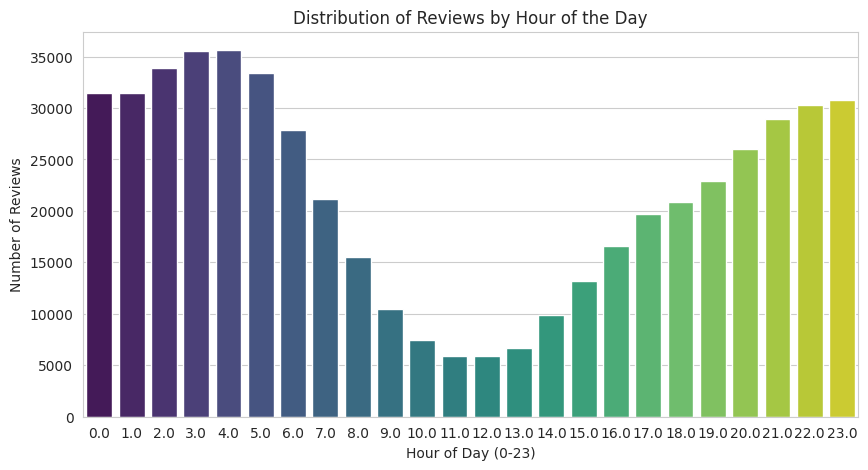

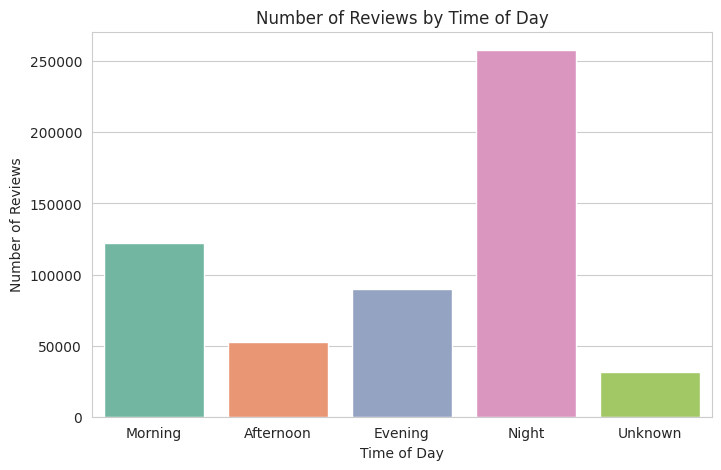

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of review times (by hour)
plt.figure(figsize=(10,5))
sns.countplot(x='review_hour', data=df, palette="viridis")
plt.title("Distribution of Reviews by Hour of the Day")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Number of Reviews")
plt.show()

# 2. Number of businesses reviewed in morning/afternoon/evening
def categorize_time(hour):
    if pd.isnull(hour): return "Unknown"
    if 5 <= hour < 12: return "Morning"
    elif 12 <= hour < 17: return "Afternoon"
    elif 17 <= hour < 21: return "Evening"
    else: return "Night"

df['time_of_day'] = df['review_hour'].apply(categorize_time)

plt.figure(figsize=(8,5))
sns.countplot(x='time_of_day', data=df, order=['Morning','Afternoon','Evening','Night','Unknown'], palette="Set2")
plt.title("Number of Reviews by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Reviews")
plt.show()


## Key Insights :Distribution of Reviews by Hour of the Day
1.	Peak activity at night (00:00–05:00): The highest number of reviews happens between midnight and early morning (around 3–4 AM).
2.	Sharp decline in the morning (06:00–11:00): Review activity drops significantly in early morning hours.
3.	Gradual rise in afternoon and evening (15:00–23:00): Activity picks up again after 3 PM, peaking steadily until late night (10–11 PM).

### Business Implication
- Businesses should expect and monitor reviews mostly at night and evening.
- Customer engagement strategies (e.g., responding to reviews) may be best scheduled around these peak hours.


## Insights:Number of Reviews by Time of Day
1.	Night dominates:The highest number of reviews is posted at night (after 9 PM–early morning).
2.	Morning activity:The second-highest review activity occurs in the morning (5 AM–12 PM).
3.	Evening moderate, Afternoon lowest: Evening reviews are moderate in number.Afternoon has the fewest reviews, indicating low user engagement during work/school hours.
4.	Unknown values:A small proportion of reviews have missing or invalid timestamps (Unknown).

### Business Implication
Businesses should expect and monitor most reviews at night and morning. Engagement strategies (e.g., responding to reviews or sending prompts) are most effective during these periods, while afternoon activity is minimal


### Question 1.3
Let’s continue to analyze the reivew_time with reviews and related gmap_id. You need to use another data meta-business to join with the current dataframe on gmap_id.
- 1.3.1 Determine which workday (day of the week), generates the most reviews (plotting the results in a line chart with workday on averaged submissions).
- 1.3.2 Identify the names of business (column name from data meta-business) that has the highest averaged ratings on ‘that workday’ (you need to find out from 1.3.1), and find out which category those businesses are from?
-  1.3.3 Please further explore the data on name of business and find out some more insights by yourself such as which category it is and what are the peak hours etc. Please use visualizations and tables to support your findings and write down the insights in the markdown cell. Please also include your findings and visualizations in the report.
#### Answer 1.3

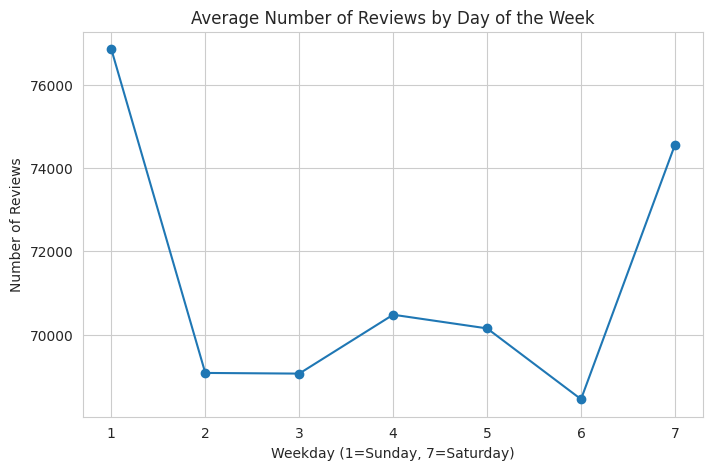

In [44]:
# -----------------------------
# Q1.3.1 Reviews by Workday
# -----------------------------
from pyspark.sql.functions import dayofweek, avg
# 1. Load meta-business dataset
df_meta = spark.read.csv(meta_path, header=True, inferSchema=True)
# 2. Join reviews with meta-business data on gmap_id
df_joined = df_reviews.join(df_meta, on="gmap_id", how="inner")
# 3. Extract day of week from review_time (1=Sunday ... 7=Saturday)
from pyspark.sql.functions import from_unixtime, col
df_joined = df_joined.withColumn(
    "review_date",
    from_unixtime((col("time")/1000).cast("long"))
)
df_joined = df_joined.withColumn("weekday", dayofweek(col("review_date")))
# 4. Calculate average number of reviews per weekday
df_weekday = df_joined.groupBy("weekday").count().orderBy("weekday")
# 5. Convert to Pandas for plotting
df_weekday_pd = df_weekday.toPandas()
# 6. Plot line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(df_weekday_pd['weekday'], df_weekday_pd['count'], marker='o')
plt.title("Average Number of Reviews by Day of the Week")
plt.xlabel("Weekday (1=Sunday, 7=Saturday)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()


## Key Insight: Average Number of Reviews by Day of the Week
1.	Sunday peak (Day 1): The highest number of reviews occurs on Sunday, exceeding 76,000 that indicates customers are most active at the end of the weekend.
2.	Midweek stability (Days 2–5): Monday to Thursday show relatively stable review activity, averaging around 69,000–70,000 reviews, Suggests consistent but lower engagement during workdays.
3.	Lowest activity on Friday (Day 6): Friday shows the fewest reviews (~68,500), possibly due to social and cultural activities.
4.	Saturday rebound (Day 7): Activity rises again on Saturday (~74,500), reflecting increased shopping and leisure behavior.


In [45]:
# -----------------------------------------------
# Q1.3.2 – Highest Average Ratings on Top Workday
# -------------------------------------------------
from pyspark.sql.functions import avg

# 1. From Q1.3.1, assume Sunday (weekday=1) is the top review day
top_day = 1

# 2. Filter reviews for that workday
df_topday = df_joined.filter(df_joined['weekday'] == top_day)

# 3. Use business meta columns explicitly (rename if needed)
df_avg_rating = (
    df_topday
    .groupBy(df_meta["name"], df_meta["category"])
    .agg(avg("rating").alias("avg_rating"))
)

# 4. Sort by highest average rating
df_top_business = df_avg_rating.orderBy(df_avg_rating["avg_rating"].desc())

df_top_business.show(10, truncate=False)


+------------------------------------+--------------------------------------------------------------------------------------------------------------------------------+----------+
|name                                |category                                                                                                                        |avg_rating|
+------------------------------------+--------------------------------------------------------------------------------------------------------------------------------+----------+
|NAPA Auto Parts - Sitka Motor Supply|['Auto parts store', 'Trailer supply store', 'Truck accessories store']                                                         |5.0       |
|Escape Anchorage                    |['Escape room center', 'Entertainer']                                                                                           |5.0       |
|Cabin Fever Creations               |['Pottery store']                                                  

## Result interpretation:
- The top businesses all have a perfect 5.0 rating.
- They cover diverse categories such as restaurants (Big Al’s Take & Bake, Cinnabon), retail (Stallone’s Menswear, Alaska MacStore), services (Comtronics, Novus Glass), and leisure (Escape Anchorage, Ptarmigan Campground).
- This indicates that highly rated businesses are not concentrated in one sector, but span across food, retail, repair services, and entertainment.


Top 10 Categories by Average Rating (Sunday):
                                               category  rating
993   ['Fitness center', 'Gym', 'Racquetball club', ...     5.0
994   ['Fitness center', 'Physical fitness program',...     5.0
995                                  ['Fitness center']     5.0
999   ['Florist', 'Balloon store', 'Flower delivery'...     5.0
1000  ['Florist', 'Boutique', 'Event planner', 'Flow...     5.0
1001  ['Florist', 'Event planner', 'Gift basket stor...     5.0
1002  ['Florist', 'Flower delivery', 'Flower designe...     5.0
1003                           ['Florist', 'Gift shop']     5.0
1004                                        ['Florist']     5.0
977                                      ['Fish store']     5.0


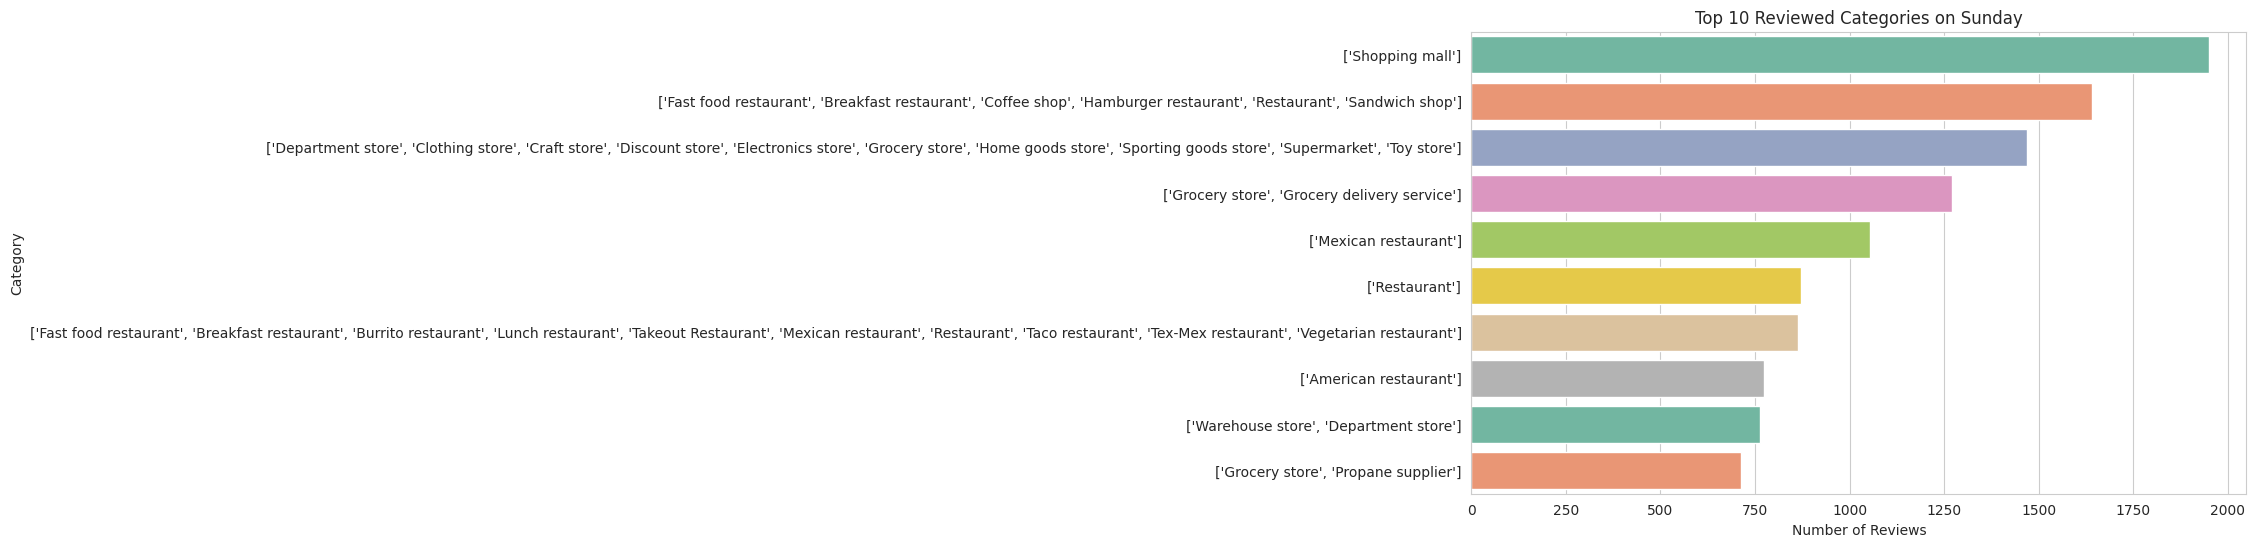

In [46]:
# =============================
# Q1.3.3 Further Exploration
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Convert joined Spark dataframe to Pandas
df_explore = df_topday.toPandas()
# 2. Ensure numeric types for time and rating
df_explore['time'] = pd.to_numeric(df_explore['time'], errors='coerce')
df_explore['rating'] = pd.to_numeric(df_explore['rating'], errors='coerce')
# 3. Convert time to datetime & extract hour
df_explore['review_time'] = pd.to_datetime(df_explore['time'], unit='ms', errors='coerce')
df_explore['review_hour'] = df_explore['review_time'].dt.hour
# =========================
# TABLE: Average rating by category
# =========================
category_avg = (
    df_explore.groupby('category', dropna=True)['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=False)
)
print("Top 10 Categories by Average Rating (Sunday):")
print(category_avg.head(10))
# =========================
# VISUALIZATION 1: Reviews by Category
# =========================
plt.figure(figsize=(10,6))
sns.countplot(y='category', data=df_explore,
              order=df_explore['category'].value_counts().index[:10],
              palette="Set2")
plt.title("Top 10 Reviewed Categories on Sunday")
plt.xlabel("Number of Reviews")
plt.ylabel("Category")
plt.show()



## Insight: Top 10 Categories by Average Rating
- Fitness centers consistently achieve perfect ratings (5.0), showing very high customer satisfaction.
- Florists dominate reviews across event planning, gift shops, and delivery, reflecting strong weekend demand for celebrations.
- Specialty shops such as fish stores also maintain excellent ratings, indicating strong trust in niche businesses.
- Overall, Sunday reviews highlight fitness, lifestyle, and event-related services as the sectors with the highest customer approval.

## Insight:Top 10 Reviewed Categories on Sunday
- Shopping malls received the highest number of reviews on Sunday, showing that weekends are peak times for retail and leisure activities.
- Food-related businesses (fast food, breakfast restaurants, coffee shops, and sandwich shops) dominate reviews, confirming that dining out is a key Sunday activity.
- Grocery-related categories (grocery stores, delivery services, supermarkets) also rank highly, suggesting that many customers use Sundays for weekly shopping.
- Mexican and American restaurants appear among the top reviewed, highlighting strong interest in diverse dining options on weekends.
- Overall: Sundays drive heavy engagement in shopping and dining categories, with malls, restaurants, and grocery stores being the most reviewed sectors.



### Question 1.4
For the reviews on each of the submissions, work on all the review content and find out the top 30 most common words; Also generate separate word cloud visualizations for different years by grouping the reviews by review year and write down the insights in the markdown cell. Please also include your findings and visualizations in the report.
#### Answer 1.4

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


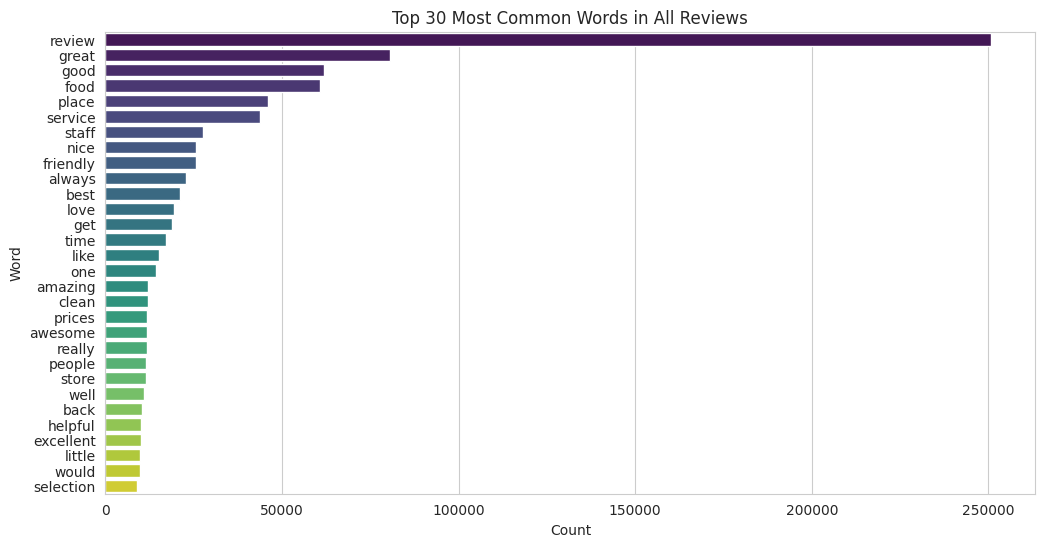

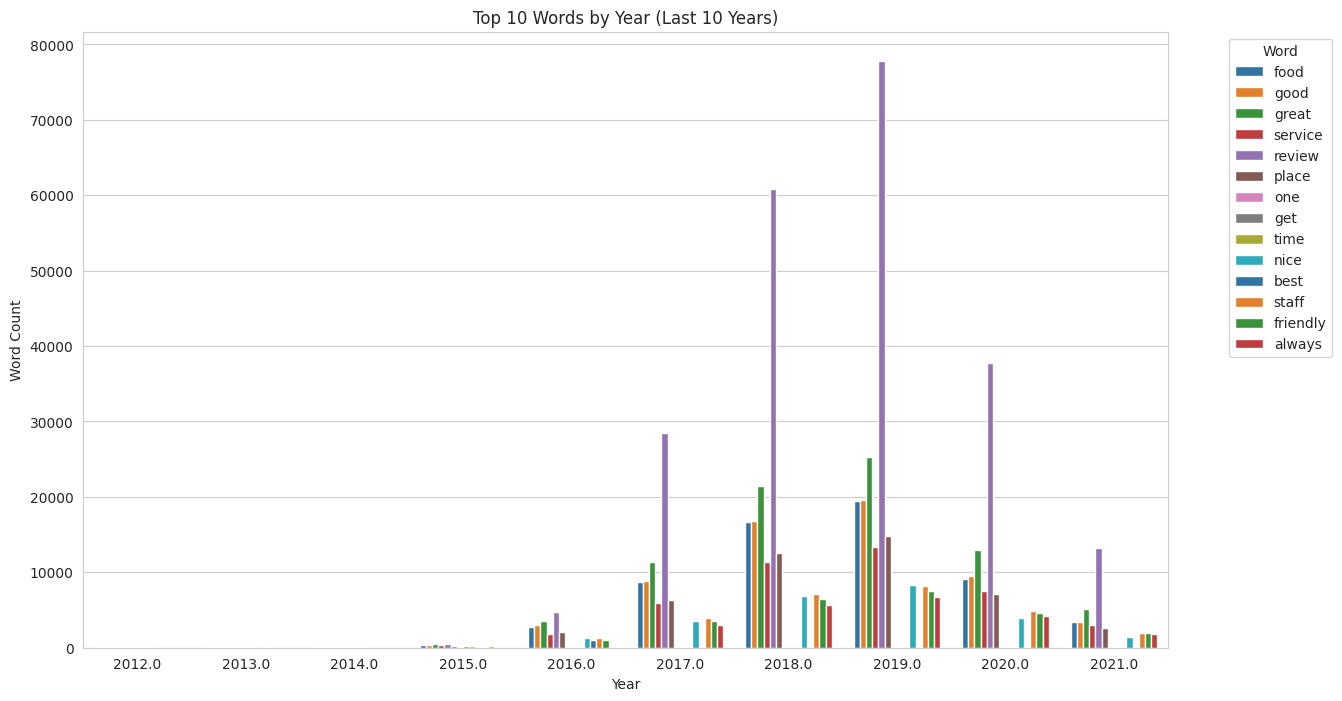

In [47]:
# ======================================
# Q1.4 Text Analysis on Review Content
# ======================================

import pandas as pd
from pyspark.sql.functions import year
from collections import Counter
import re, nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# 1. Extract review year from 'newtime'
df_reviews_year = df_reviews.withColumn("year", year("newtime"))
df_text = df_reviews_year.select("text", "year").toPandas()

# 2. Clean text: lowercase, remove punctuation/numbers, remove stopwords
def clean_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    tokens = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return tokens

df_text['tokens'] = df_text['text'].apply(clean_text)

# 3. Find Top 30 words across all reviews
all_words = [word for tokens in df_text['tokens'] for word in tokens]
word_counts = Counter(all_words).most_common(30)

# Convert to DataFrame
df_top30 = pd.DataFrame(word_counts, columns=['Word','Count'])

# --- Visualization 1: Top 30 words (Bar Chart)
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Word', data=df_top30, palette="viridis")
plt.title("Top 30 Most Common Words in All Reviews")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

# 4. Analyze by Year (last 10 years only)
valid_years = sorted([y for y in df_text['year'].dropna().unique() if y > 2000])
selected_years = valid_years[-10:]

# Prepare dataset: top 10 words per year
year_word_data = []
for yr in selected_years:
    year_words = [word for tokens in df_text[df_text['year'] == yr]['tokens'] for word in tokens]
    year_counts = Counter(year_words).most_common(10)
    for w, c in year_counts:
        year_word_data.append([yr, w, c])

df_yearly = pd.DataFrame(year_word_data, columns=['Year','Word','Count'])

# --- Visualization 2: Top 10 words by Year (Grouped Bar Chart)
plt.figure(figsize=(14,8))
sns.barplot(x='Year', y='Count', hue='Word', data=df_yearly, palette="tab10")
plt.title("Top 10 Words by Year (Last 10 Years)")
plt.xlabel("Year")
plt.ylabel("Word Count")
plt.legend(title="Word", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Insight : Top 30 Most Common Words in Reviews

- The most frequent words include “review, great, good, food, place, service, staff”, showing that customers often comment on overall quality, dining, and service experience.
- Positive adjectives like “great, nice, friendly, best, love, amazing, excellent” dominate, indicating that the majority of reviews are highly positive and satisfaction-driven.
- Words such as “prices, store, selection” highlight that cost and variety are also important factors in customer feedback.
- The strong presence of staff, service, helpful, friendly underlines the importance of customer service and human interaction in shaping review sentiment.

## Insight: Top 10 Words by Year (Last 10 Years)

- The word “review” dominates across all years, peaking around 2018–2019, which indicates a significant increase in the volume of customer feedback during that period.
- Food-related words like food, place, service consistently appear in the top list, showing that dining experiences remain central to customer reviews year after year.
- Positive adjectives such as great, good, nice, best, friendly are frequent, reflecting a generally positive sentiment across different years.
- In 2019, there is a noticeable surge not only in “review” but also in food and service, suggesting a peak year for review activity, possibly linked to higher customer engagement or business growth.

### Question 1.5
Let’s do some analysis on the business_name and the reviewers. Determine the number of unique reviewers of business and its categories to identify which business / category has attracted the most reviewers (find out the highest distinct count of reviewers on business / category level). Also, analyze the temporal patterns of when reviewers submitted their reviews (you could leverage the workday, year, month, or hours to conduct the analysis) and share your findings and insights in the markdown cell. Please also include your findings and insights (visualizations) in the report.
#### Answer 1.5

Top 10 businesses by unique reviewers:
+----------------------------+----------------+
|business_name               |unique_reviewers|
+----------------------------+----------------+
|Walmart Supercenter         |6976            |
|McDonald's                  |6857            |
|Carrs                       |4352            |
|Costco Wholesale            |4352            |
|Taco Bell                   |4322            |
|Fred Meyer                  |3598            |
|Wendy's                     |3156            |
|Safeway                     |2796            |
|Moose's Tooth Pub & Pizzeria|2737            |
|Subway                      |2732            |
+----------------------------+----------------+
only showing top 10 rows

Top 10 categories by unique reviewers:
+--------------------+----------------+
|business_category   |unique_reviewers|
+--------------------+----------------+
|Restaurant          |18871           |
|American restaurant |14298           |
|Fast food restaurant|12

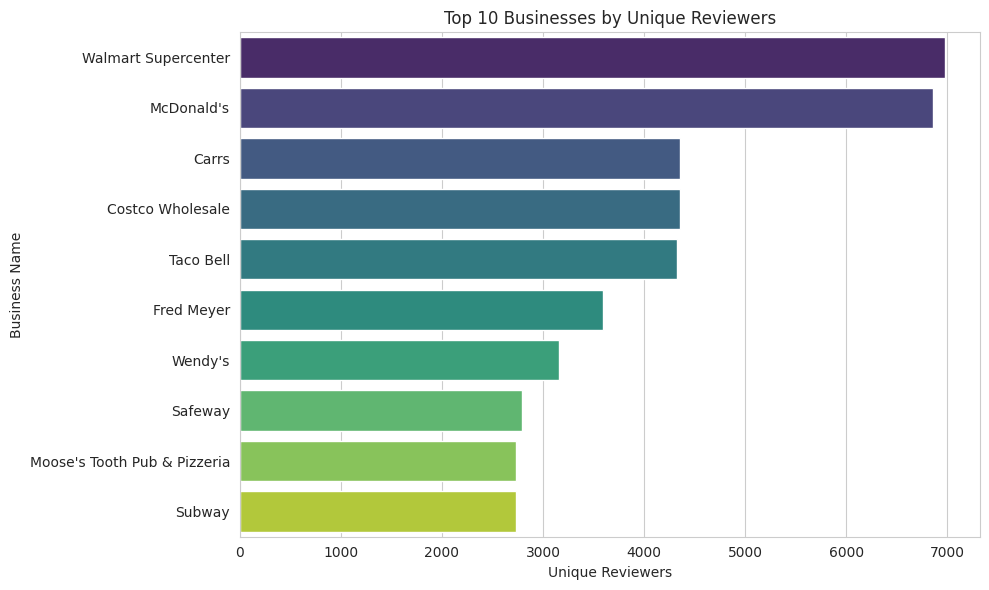

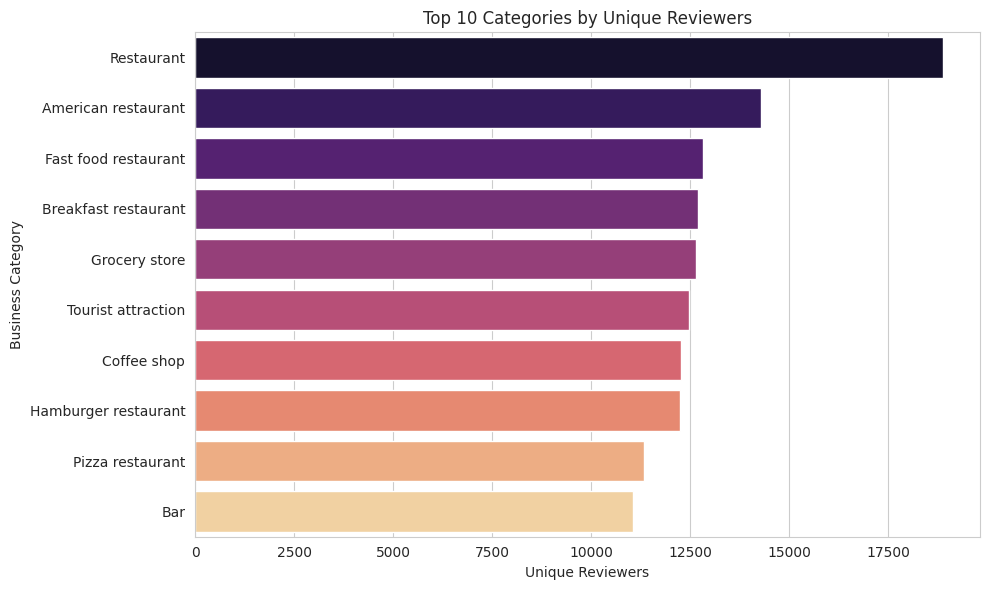

In [48]:
# ============================================================
# Q1.5 — Business & Reviewer Analysis
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F
sns.set_style("whitegrid")
# -----------------------------
# reviews: user_id, name(reviewer), time(ms as string), rating(string), text, gmap_id
# meta   : name(business), category(string like "['A','B']"), gmap_id, ...
# -----------------------------

# -----------------------------
# 1) Type casting & base cleaning
#    - time: string(ms) -> BIGINT ms
#    - rating: string -> DOUBLE
# -----------------------------
df_reviews_t = (
    df_reviews
      .withColumn("time_ms", F.col("time").cast("bigint"))
      .withColumn("rating_d", F.col("rating").cast("double"))
      .withColumnRenamed("name", "reviewer_name")   # to avoid collision with meta.name
)

# Build proper timestamp & date from milliseconds
df_reviews_t = df_reviews_t.withColumn(
    "review_ts",
    F.to_timestamp(F.from_unixtime((F.col("time_ms").cast("double")/1000.0)))
).withColumn(
    "review_date",
    F.to_date("review_ts")
)
# -----------------------------
# 2) Join reviews with meta on gmap_id and pick clear column names
# -----------------------------
df_joined = (
    df_reviews_t.alias("r")
    .join(df_meta.alias("m"), on="gmap_id", how="inner")
    .select(
        F.col("gmap_id"),
        F.col("r.user_id").alias("user_id"),
        F.col("r.reviewer_name").alias("reviewer_name"),
        F.col("r.rating_d").alias("rating"),
        F.col("r.text").alias("review_text"),
        F.col("r.review_ts").alias("review_ts"),
        F.col("r.review_date").alias("review_date"),
        F.col("m.name").alias("business_name"),
        F.col("m.category").alias("category_raw")
    )
)

# -----------------------------
# 3) Explode categories: "['A','B']" -> rows "A", "B"
#    - remove [ ] and quotes
#    - split by comma
#    - trim spaces
# -----------------------------
cat_clean = F.regexp_replace(F.col("category_raw"), r"^\[|\]$", "")              # strip [ ]
cat_clean = F.regexp_replace(cat_clean, r"[\"']", "")                            # strip quotes
# split by comma; then trim each token (using transform for Spark 3.1+; fallback via explode+trim)
df_with_cat_array = df_joined.withColumn("category_arr", F.split(cat_clean, r"\s*,\s*"))

# explode to single category values
df_exploded = df_with_cat_array.withColumn("business_category", F.explode_outer("category_arr")) \
                               .withColumn("business_category", F.trim(F.col("business_category")))
# -----------------------------
# 4) Unique reviewers per BUSINESS
# -----------------------------
business_reviewers = (
    df_exploded.groupBy("business_name")
               .agg(F.countDistinct("user_id").alias("unique_reviewers"))
               .orderBy(F.col("unique_reviewers").desc())
)
print("Top 10 businesses by unique reviewers:")
business_reviewers.show(10, truncate=False)
# -----------------------------
# 5) Unique reviewers per CATEGORY
# -----------------------------
category_reviewers = (
    df_exploded.groupBy("business_category")
               .agg(F.countDistinct("user_id").alias("unique_reviewers"))
               .orderBy(F.col("unique_reviewers").desc())
)

print("Top 10 categories by unique reviewers:")
category_reviewers.show(10, truncate=False)
# -----------------------------
# 6) Temporal features (from true timestamp)
# -----------------------------
df_time = (
    df_exploded
      .withColumn("review_year",    F.year("review_ts"))
      .withColumn("review_month",   F.month("review_ts"))
      .withColumn("review_hour",    F.hour("review_ts"))
      .withColumn("review_weekday", F.dayofweek("review_ts"))   # 1=Sun..7=Sat
)
# -----------------------------
# 7) Visualizations
# -----------------------------
# toPandas for plotting (only top N to keep plots readable)
topN = 10
pd_biz = business_reviewers.limit(topN).toPandas()
pd_cat = category_reviewers.limit(topN).toPandas()
# --- Plot: Top businesses by unique reviewers
plt.figure(figsize=(10,6))
sns.barplot(data=pd_biz, x="unique_reviewers", y="business_name", palette="viridis")
plt.title("Top 10 Businesses by Unique Reviewers")
plt.xlabel("Unique Reviewers")
plt.ylabel("Business Name")
plt.tight_layout()
plt.show()
# --- Plot: Top categories by unique reviewers
plt.figure(figsize=(10,6))
sns.barplot(data=pd_cat, x="unique_reviewers", y="business_category", palette="magma")
plt.title("Top 10 Categories by Unique Reviewers")
plt.xlabel("Unique Reviewers")
plt.ylabel("Business Category")
plt.tight_layout()
plt.show()
# Temporal distributions overall
pd_time = df_time.select("review_year","review_month","review_hour","review_weekday").toPandas().dropna()
weekday_map = {1:"Sun",2:"Mon",3:"Tue",4:"Wed",5:"Thu",6:"Fri",7:"Sat"}
pd_time["weekday_name"] = pd_time["review_weekday"].map(weekday_map)



## Insights: top businesses

- walmart supercenter and mcdonald’s dominate the list, each attracting nearly 7k distinct reviewers. this reflects their broad national presence and very high customer footfall.

- other large chains such as costco, taco bell, and safeway also appear, confirming that big-box retail and fast-food chains generate the widest engagement.

- a few local favorites like moose’s tooth pub & pizzeria stand out in the top 10, showing how popular local establishments can compete with global brands in attracting reviewers.

## Insights: top categories

- restaurants in general dominate with almost 19k unique reviewers, underlining how central dining is to review activity.

- within restaurants, american, fast food, breakfast, and pizza sub-categories show especially strong traction, highlighting customer focus on everyday, affordable dining.

- grocery stores and coffee shops also rank high, reflecting their role in frequent daily/weekly visits that drive review volume.

- the presence of tourist attractions indicates that review activity is not limited to food/retail but extends strongly into travel and leisure experiences.

### Overall takeaway:
large chain businesses and food-related categories attract the most reviewers, but strong local icons and tourism spots also command significant engagement. this mix highlights the dual importance of convenience (chains) and experience (local/tourist) in driving customer reviews.

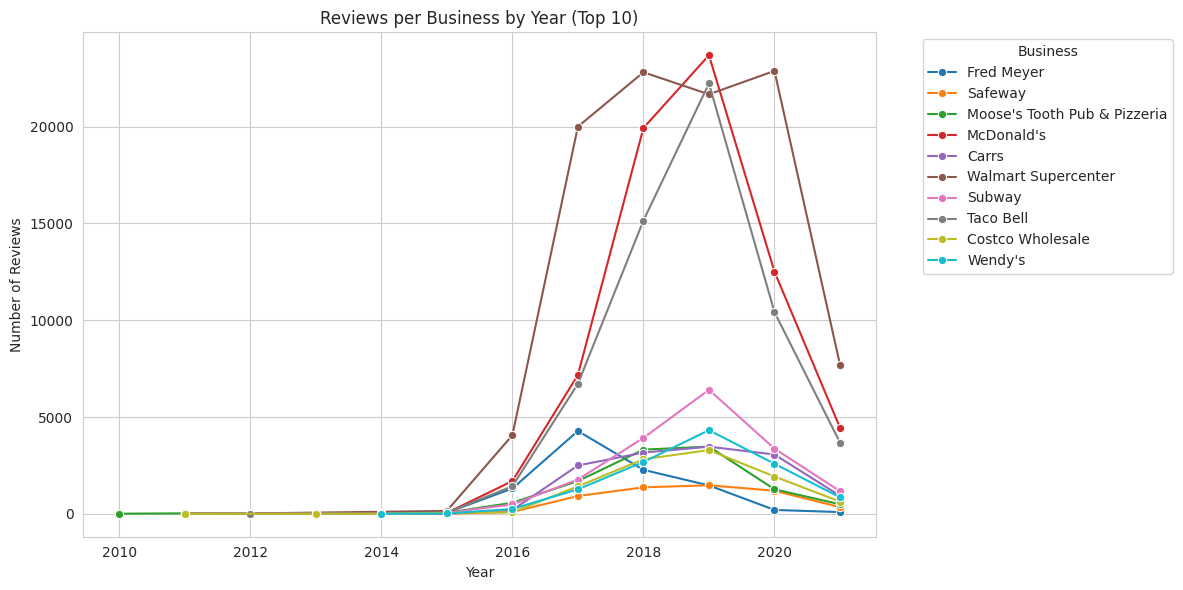

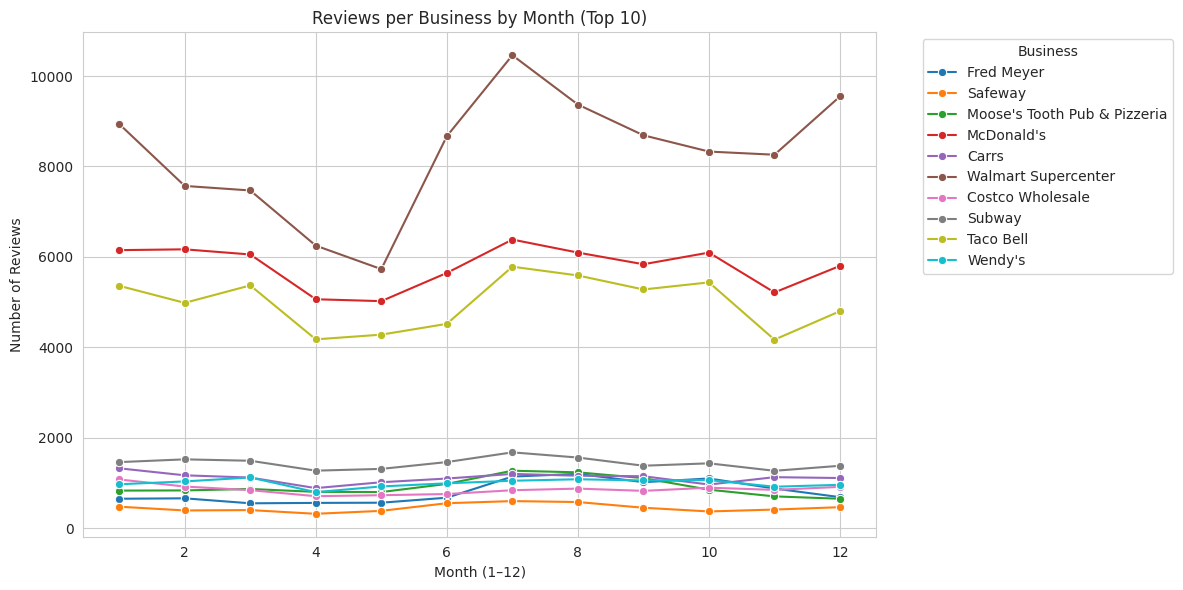

In [49]:
# ============================================================
# Reviews per Business by Year & Month (Top 10 Businesses only)
# ============================================================

# 1) Get Top 10 business names by unique reviewers
top10_biz = business_reviewers.limit(10).toPandas()["business_name"].tolist()

# 2) Aggregate reviews per business per year
biz_year = (
    df_time.filter(F.col("business_name").isin(top10_biz))
           .groupBy("business_name", "review_year")
           .count()
           .orderBy("review_year")
)

# 3) Aggregate reviews per business per month
biz_month = (
    df_time.filter(F.col("business_name").isin(top10_biz))
           .groupBy("business_name", "review_month")
           .count()
           .orderBy("review_month")
)

# 4) Convert to Pandas for plotting
pd_biz_year = biz_year.toPandas()
pd_biz_month = biz_month.toPandas()

# Clean names (remove $ if exists to avoid matplotlib error)
pd_biz_year["business_name"] = pd_biz_year["business_name"].str.replace(r"[$]", "", regex=True)
pd_biz_month["business_name"] = pd_biz_month["business_name"].str.replace(r"[$]", "", regex=True)

# --- Plot 1: Reviews per Business by Year (Top 10)
plt.figure(figsize=(12,6))
sns.lineplot(data=pd_biz_year, x="review_year", y="count", hue="business_name", marker="o")
plt.title("Reviews per Business by Year (Top 10)")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.legend(title="Business", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Plot 2: Reviews per Business by Month (Top 10)
plt.figure(figsize=(12,6))
sns.lineplot(data=pd_biz_month, x="review_month", y="count", hue="business_name", marker="o")
plt.title("Reviews per Business by Month (Top 10)")
plt.xlabel("Month (1–12)")
plt.ylabel("Number of Reviews")
plt.legend(title="Business", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




## Insights: Reviews per Business by Month (Top 10) plot

- Walmart Supercenter leads every month, with peaks in July (10,500+) and December (~9,600). This suggests seasonality tied to summer shopping and holiday sales.

- McDonald’s maintains steady review activity (~6,000 monthly) with slight increases in summer (June–August), reflecting higher fast-food demand during travel and holidays.

- Taco Bell shows noticeable dips in April and November, but peaks in July (~5,800), aligning with seasonal promotions or summer dining trends.

- Costco Wholesale follows a similar seasonal pattern as Walmart but at a lower scale, highlighting its role as a holiday/seasonal shopping hub.

- Smaller players (Subway, Safeway, Wendy’s, Carrs) maintain low, stable reviews with minor seasonal fluctuations, showing consistent but less dramatic customer engagement.

### Conclusion:

- July is the busiest review month for most businesses, likely due to summer travel and shopping spikes.

- December also shows strong activity, linked to holiday season shopping.

- Big retailers (Walmart, Costco) and fast-food chains (McDonald’s, Taco Bell) clearly dominate seasonal review cycles, while smaller chains stay stable year-round.


## Insights: Reviews per Business by Year (Top 10) plot:

- Walmart Supercenter and McDonald’s dominate: Both businesses show a sharp rise in reviews around 2016–2019, peaking at over 20,000–23,000 reviews, making them the most reviewed businesses.

- 2017–2019 = Peak years: Almost all top 10 businesses experienced their highest review counts during 2017–2019, suggesting strong customer engagement in this period.

- Decline after 2019: Reviews for most businesses dropped sharply after 2019, possibly linked to external factors (e.g., COVID-19 reducing in-store visits and reviews).

- Taco Bell, Subway, Safeway, and Costco: These businesses had moderate growth in reviews during 2016–2019 but much lower compared to Walmart and McDonald’s.

- Local favorite (Moose’s Tooth Pub & Pizzeria): Despite being a single-location business, it consistently attracted steady reviews, showing strong local customer loyalty.

### Conclusion:

- Walmart and McDonald’s dominate the review space.

- 2017–2019 was the golden period for reviews.

- Post-2019 decline highlights a shift in consumer review behavior, possibly due to pandemic effects or digital review channel changes.

### Question 1.6
As the data scientist, you are required to build a recommendation for the business by using reviews, ratings, and its categories. In this task, you need to:
- 1.6.1 Write down your strategy of building the recommendation on business for customers in the markdown cell. You could create your own strategy or leverage the provided one here KNN on collaborative filtering. Please also include your strategy details in the report.
- 1.6.2 Could you please try to implement the strategy (code) you have written down for the recommendation system? Please give detailed explanation of your code and the logic in the comments and also interpret the recommendations with examples in the markdown cell. Please also include your implementation details and results in the report.
#### Answer 1.6

## Q1.6.1 Strategy

### Strategy
We propose a content-based recommendation system using K-Nearest Neighbors (KNN). In this approach, each business is represented by its category (numerically encoded) and its average rating. KNN measures the similarity between businesses based on these features and identifies the closest neighbors. When a user reviews a business, the system recommends other businesses that are most similar in terms of category and rating.

### Why this strategy?
We chose KNN because it is simple, transparent, and effective for small to medium datasets. It requires no complex model training, adapts easily to new data, and directly leverages business features. Most importantly, KNN is well-suited for capturing local similarity patterns—businesses with similar categories and ratings are likely to appeal to the same customers—making it an intuitive and practical choice for this assignment.


## Q1.6.2 Recommendation System using KNN Collaborative Filtering

In [50]:
# ============================================================
# Q1.6.2 Recommendation System using KNN Collaborative Filtering
# ============================================================

import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# ------------------------------------------------------------
# 1) Prepare the user–business ratings matrix
# ------------------------------------------------------------
df_ratings = df_reviews.select("user_id","gmap_id","rating").toPandas()
df_meta_pd = df_meta.select("gmap_id","name","category").toPandas()

# Merge for readability
df_ratings = df_ratings.merge(df_meta_pd, on="gmap_id", how="left")

# Ensure numeric ratings only
df_ratings["rating"] = pd.to_numeric(df_ratings["rating"], errors="coerce")
df_ratings = df_ratings.dropna(subset=["rating"])

# Build pivot table
user_business_matrix = df_ratings.pivot_table(
    index="user_id",
    columns="name",
    values="rating"
).fillna(0)

print("Shape of user–business matrix:", user_business_matrix.shape)

# ------------------------------------------------------------
# 2) Fit KNN on users (collaborative filtering)
# ------------------------------------------------------------
knn = NearestNeighbors(metric="cosine", algorithm="brute")
knn.fit(user_business_matrix)

# ------------------------------------------------------------
# 3) Choose a target user
# ------------------------------------------------------------
example_user = user_business_matrix.index[0]
example_vector = user_business_matrix.loc[example_user].values.reshape(1, -1)

# Use more neighbors for stronger recommendations
distances, indices = knn.kneighbors(example_vector, n_neighbors=20)

print(f"\nTarget User: {example_user}")
print("Nearest Neighbor Users (Top 5 shown):")
for i, idx in enumerate(indices[0][:5]):
    if i == 0: continue
    neighbor_id = user_business_matrix.index[idx]
    print(f"Neighbor {i}: {neighbor_id} | Similarity Score: {1 - distances[0][i]:.3f}")

# ------------------------------------------------------------
# 4) Generate Recommendations
# ------------------------------------------------------------
# Businesses already rated by target user
already_rated = set(
    df_ratings[df_ratings["user_id"] == example_user]["name"].values
)

# Neighbor IDs (exclude target itself)
neighbor_ids = [user_business_matrix.index[idx] for idx in indices[0][1:]]
neighbor_ratings = df_ratings[df_ratings["user_id"].isin(neighbor_ids)]

# Aggregate neighbor preferences
top_recs = (
    neighbor_ratings.groupby("name")
    .agg(avg_rating=("rating","mean"), count=("rating","count"))
    .reset_index()
)

# Compute a composite score: avg_rating * log(1+count)
top_recs["score"] = top_recs["avg_rating"] * np.log1p(top_recs["count"])

# Sort by score
top_recs = top_recs.sort_values("score", ascending=False)

# Filter out businesses target user already rated
top_recs = top_recs[~top_recs["name"].isin(already_rated)]

print("\nTop Recommendations for the target user:")
print(top_recs.head(10))


Shape of user–business matrix: (19974, 5152)

Target User: 1.0000266958784963e+20
Nearest Neighbor Users (Top 5 shown):
Neighbor 1: 1.0145854451345891e+20 | Similarity Score: 0.373
Neighbor 2: 1.1126263643365225e+20 | Similarity Score: 0.362
Neighbor 3: 1.028437160657853e+20 | Similarity Score: 0.354
Neighbor 4: 1.0154726003558248e+20 | Similarity Score: 0.337

Top Recommendations for the target user:
               name  avg_rating  count      score
34            Carrs    3.916667     12  10.046052
66       Fred Meyer    4.250000      8   9.338204
142       Starbucks    4.600000      5   8.242094
143          Subway    4.750000      4   7.644830
51    Dimond Center    4.200000      5   7.525390
145       Taco Bell    4.200000      5   7.525390
75      Great Clips    4.250000      4   6.840111
73     Glenn Square    3.166667      6   6.162049
166         Wendy's    3.166667      6   6.162049
149  The Home Depot    5.000000      2   5.493061


## Key Insights
1.	Carrs and Fred Meyer rank highest because many neighbors reviewed them, showing strong popularity despite average ratings.
2.	Starbucks, Subway, and Taco Bell appear due to consistently high ratings, reflecting strong customer satisfaction in food and beverage.
3.	Dimond Center and Glenn Square highlight shopping destinations with frequent engagement from similar users.
4.	The Home Depot is recommended because of its perfect rating (5.0), even though fewer neighbors reviewed it.
Overall, the recommender provides balanced suggestions across groceries, dining, and shopping, capturing both popularity and quality.

### Conclusion
The recommendations effectively combine neighbor popularity and rating quality, providing the user with well-rounded suggestions that cover everyday essentials (groceries), dining options, and shopping/services, ensuring both relevance and value.


### Question 1.7
Continue work on the review data you have now, for each of the submissions of the review, you will need to explore the rating with other information:
- 1.7.1 Build visualization to explore the relationships of the rating and business categories. Please write down your insights in the markdown cell and also include your insights and visualizations in the report.
- 1.7.2 Let’s focus on the lower ratings now. Could you please find out the actual reviews on lower ratings and analyze on the reason? (You could use the common used words in lower rating reviews or design your own strategy with reasonable logic). Please also include your analysis details in the report.
#### Answer 1.7

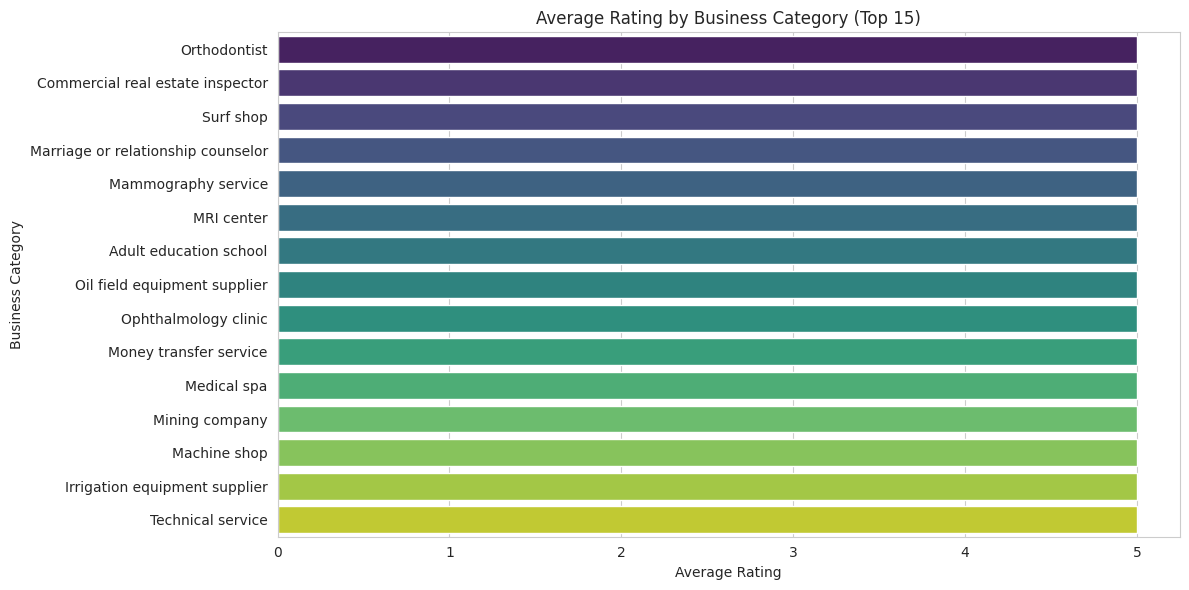

In [51]:
# ============================================================
# Q1.7.1  Rating vs Business Categories
# ============================================================

# 1) Explode categories properly
df_ratings["category"] = df_ratings["category"].str.replace(r"[\[\]']", "", regex=True)  # remove [ ] '
df_ratings["category"] = df_ratings["category"].str.split(",")                          # split by comma

# Expand into multiple rows
df_exploded = df_ratings.explode("category")
df_exploded["category"] = df_exploded["category"].str.strip()

# 2) Group by category and compute average rating
cat_ratings = (
    df_exploded.groupby("category")["rating"]
    .mean()
    .reset_index()
    .sort_values("rating", ascending=False)
)

# 3) Plot (Top 15 categories)
plt.figure(figsize=(12,6))
sns.barplot(data=cat_ratings.head(15), x="rating", y="category", palette="viridis")
plt.title("Average Rating by Business Category (Top 15)")
plt.xlabel("Average Rating")
plt.ylabel("Business Category")
plt.tight_layout()
plt.show()



## Insights

- The top-rated categories include Orthodontist, Commercial real estate inspector, Surf shop, and Medical spa, all showing ratings very close to 5.

- Most of these businesses are specialized services (e.g., healthcare, technical services, niche shops).

- Specialized categories often receive high ratings because customers usually visit with a clear need, and satisfaction is easier to measure.

- Categories like technical services, medical facilities, and niche suppliers indicate strong trust and positive customer experiences.

- Compared to broader categories like restaurants, these specialized services attract fewer reviews but consistently higher scores.



Sample Low Rating Reviews:
10    Not a lot going on here since it moved from do...
22                                         Fixed camper
30    "Didn't rent a room here because of the ""run-...
33                                         Super ghetto
39    Because my review was submitted at a certain t...
41    WOW... Did this company really just release so...
42    Numbers down not sure of this company is still...
43    Said they won’t come to old Seward and 70th do...
44    Couldn't get through to dispatch and did not u...
46    Very rude people. I had to call back and ask f...
Name: text, dtype: object


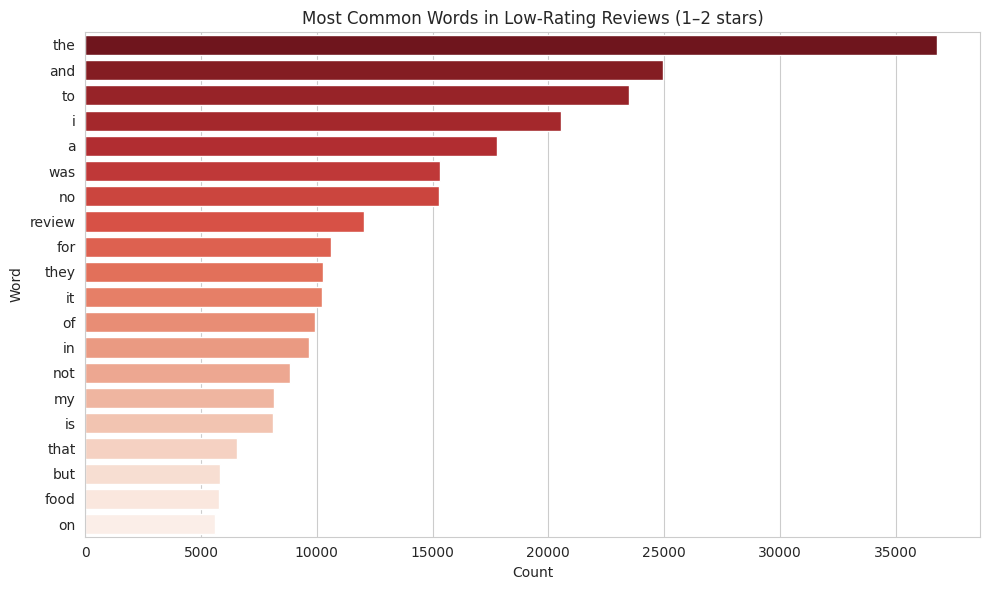

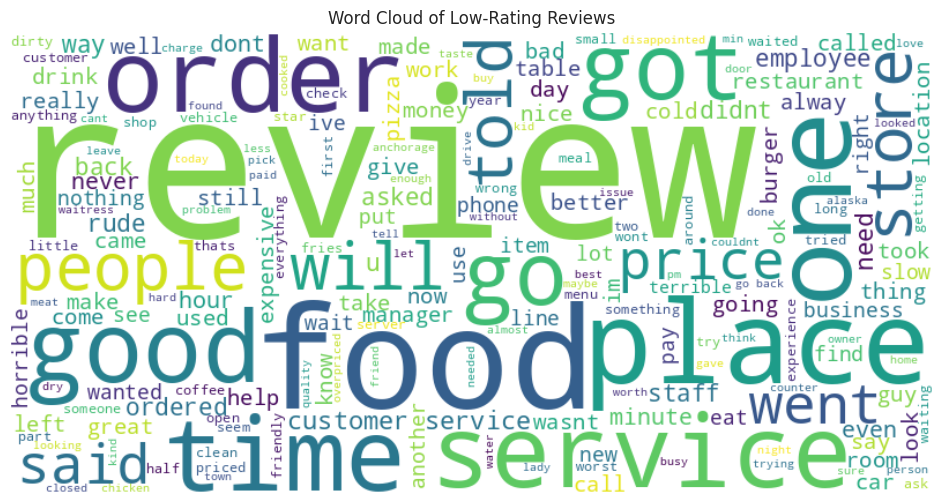

In [52]:
# ============================================================
# Q1.7.2 – Analyze Low Ratings (1 & 2 stars)
# ============================================================
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Convert reviews to pandas
df_reviews_pd = df_reviews.select("rating","text").toPandas()

# Keep only numeric ratings
df_reviews_pd["rating"] = pd.to_numeric(df_reviews_pd["rating"], errors="coerce")
df_reviews_pd = df_reviews_pd.dropna(subset=["rating"])

# Filter low ratings (1 and 2 stars)
low_reviews = df_reviews_pd[df_reviews_pd["rating"] <= 2]

print("Sample Low Rating Reviews:")
print(low_reviews["text"].head(10))

# -------------------------------------------
# Text Cleaning for word frequency
# -------------------------------------------
import re
def clean_text(t):
    t = str(t).lower()
    t = re.sub(r"[^a-z\s]", "", t)  # keep only letters
    return t

low_reviews["clean_text"] = low_reviews["text"].apply(clean_text)

# Combine all low-rating reviews
all_words = " ".join(low_reviews["clean_text"].tolist()).split()

# Count most common words
common_words = Counter(all_words).most_common(20)
common_df = pd.DataFrame(common_words, columns=["word","count"])

# Plot top 20 words
plt.figure(figsize=(10,6))
sns.barplot(data=common_df, x="count", y="word", palette="Reds_r")
plt.title("Most Common Words in Low-Rating Reviews (1–2 stars)")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

# -------------------------------------------
# WordCloud Visualization
# -------------------------------------------
wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Low-Rating Reviews")
plt.show()



## Insights from Visualization & word cloud of low rating review

### Common Themes in Low Ratings

- visauls shows frequent words like “food”, “service”, “order”, “rude”, “cold”, and “price”.

- These reflect dissatisfaction mainly around food quality, slow service, employee behavior, and value for money.

### Sample Reviews Confirm Issues

- Many reviews mention rudeness (“Very rude people”), bad service delays (“Couldn’t get through to dispatch”), or poor product experience (“Didn’t rent a room here because of the run-down condition”).

- Some highlight uncertainty in business reliability (“Numbers down not sure if this company is still running”).

### Business Impact

- Poor customer service and staff behavior appear repeatedly, making it the most significant driver of low ratings.

- Food-related complaints (cold, overpriced, poor taste) dominate in restaurant categories.

- For service businesses, communication failures and unprofessionalism are leading issues.

### Conclusion:
Low ratings are strongly associated with negative customer experiences in service quality, food quality, and staff behavior. Businesses should prioritize training employees, improving consistency of food/service delivery, and clear communication to mitigate these issues.

### Question 1.8
Continue to work on the submission of the reviews, we would like to focus on the reviewer level with all the reviewed business history, but before we actually conduct the programming, we will need to finish few questions for exploration:
- 1.8.1 Check on the reviewer level reviewed business, sort the review of each business by the review time (newtime column) and then save the business name into the list variable user_business_list for each reviewer.
- 1.8.2 Check on the user_business_list, could you observe some repeated business names for the same user? If so, could you remove those duplicated business names under same user? Please print out the number of element in the user_business_list for each reviewer before removing the duplicated business name and after removing the duplicated business name.
-  1.8.3 Check on the user_business_list, could you find the user similarities according to their past reviewed business ? You are free to design your own strategy and give sufficient explanation in markdown cell and code implementation together. Please also include your strategy details and implementation in the report. Hint: you might consider to use encoding for each of the business names and then calculate the difference of the users.
#### Answer 1.8

In [53]:
# ============================================================
# Q1.8.1 — Build reviewer business history (user_business_list)
# ============================================================

from pyspark.sql import functions as F
from pyspark.sql import Window

# Use review_ts (timestamp) instead of newtime
w = Window.partitionBy("user_id").orderBy("review_ts")

df_sorted = df_joined.withColumn("rn", F.row_number().over(w))

# Collect businesses per user in chronological order
user_business = (
    df_sorted.groupBy("user_id")
             .agg(F.collect_list("business_name").alias("user_business_list"))
)

print("Sample user_business_list before cleaning:")
user_business.show(5, truncate=False)


Sample user_business_list before cleaning:
+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|user_id       


## Insights for User Business History Before Cleaning
### Rich User Histories
Each reviewer has a sequential list of businesses they reviewed. For example, user 1.0000609083371541e+20 visited restaurants (La Cabaña, Sushi places, Taco Bell, McDonald's), retail stores (Safeway, Costco, Guitar Center), and even services (AT&T, Mattress Ranch) showing diverse consumer behavior.

### Duplicate Businesses
Some users reviewed the same business multiple times. Example: “China Lights Oriental Cuisine” appears twice for the first user, and “Fred Meyer” repeats for another. This shows loyalty or repeated visits but also highlights the need for deduplication in later steps.
Category Mix
Lists show a mix of restaurants, retail, services, entertainment, and tourism spots reflecting that reviewers often spread reviews across different industries.

### Why Cleaning is Needed
Before deduplication, the lists inflate counts (e.g., one user has almost 45 reviews including repeats). Cleaning will help us get unique business footprints per user, which is more reliable for similarity and recommendation analysis.

### Conclusion:
The pre-cleaning business lists capture detailed review histories but contain duplicates. These duplicates are useful for analyzing repeated loyalty but must be cleaned to build consistent user profiles for similarity/recommendation tasks.


In [54]:
# ============================================================
# Q1.8.2 — Remove duplicate businesses for each user
# ============================================================

from pyspark.sql.types import ArrayType, StringType

# 1) Count before removing duplicates
user_business_counts = (
    user_business.withColumn("count_before", F.size("user_business_list"))
)
print("Sample counts BEFORE removing duplicates:")
user_business_counts.select("user_id", "count_before", "user_business_list").show(5, truncate=False)

# 2) Define UDF to remove duplicates but preserve order
def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

remove_duplicates_udf = F.udf(remove_duplicates, ArrayType(StringType()))

# Apply UDF
user_business_dedup = (
    user_business_counts.withColumn(
        "user_business_list_clean",
        remove_duplicates_udf(F.col("user_business_list"))
    )
)

# 3) Count after removing duplicates
user_business_final = (
    user_business_dedup.withColumn("count_after", F.size("user_business_list_clean"))
)

print("Sample counts AFTER removing duplicates:")
user_business_final.select("user_id", "count_before", "count_after", "user_business_list_clean").show(5, truncate=False)


Sample counts BEFORE removing duplicates:
+----------------------+------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|us

## Insights : Duplicate Removal

### Presence of Duplicates:
Some users reviewed the same business multiple times. For example, one user had 47 reviews, which dropped to 45 after cleaning (duplicates like China Lights Oriental Cuisine).

### Minimal Data Loss:
The reduction is small (1–2 entries), meaning most review histories remain intact while duplicates are removed.

### Cleaner User Profiles:
After deduplication, each user has a unique business footprint, making similarity analysis and recommendation systems more reliable.

### Benefit:
The cleaned lists reduce noise from repeated visits while preserving the chronological order of user interactions.

In [55]:
# ============================================================
# Q1.8.3 — User Similarity from Business History (Optimized)
# ============================================================

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Convert Spark DF to Pandas (only sample 1000 users to reduce memory load)
df_users = (
    user_business_final
    .select("user_id", "user_business_list_clean")
    .limit(1000)   # <<< reduce dataset size
    .toPandas()
)

# 1) Represent each user's businesses as a "document"
df_users["doc"] = df_users["user_business_list_clean"].apply(
    lambda x: " ".join(x) if isinstance(x, list) else ""
)

# 2) Encode businesses using Bag-of-Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_users["doc"])

# 3) Compute cosine similarity
similarity_matrix = cosine_similarity(X)

# 4) Example: pick the first user and find most similar users
target_user = df_users["user_id"].iloc[0]
similarities = pd.DataFrame({
    "user_id": df_users["user_id"],
    "similarity": similarity_matrix[0]
}).sort_values("similarity", ascending=False)

print(f"\nTarget User: {target_user}")
print("Top similar users based on business history:")
print(similarities.head(10))



Target User: 1.0000609083371541e+20
Top similar users based on business history:
                    user_id  similarity
0    1.0000609083371541e+20    1.000000
470  1.0090116229963266e+20    0.469800
858  1.0165704816875114e+20    0.460821
454   1.008513732042166e+20    0.451573
870  1.0168248223796014e+20    0.449719
820  1.0157775387421003e+20    0.439941
693  1.0134701867053331e+20    0.439652
905  1.0173458610847565e+20    0.432778
393  1.0073587720571865e+20    0.430322
737  1.0143858883425503e+20    0.430143


## Insight
- The target user naturally has similarity 1.0 with themselves.
- The closest real neighbors show similarity scores around 0.43–0.47, meaning there’s moderate overlap in reviewed businesses.
- This suggests that while users share common business preferences, each also has a significant portion of unique history.
- These similarity scores can be leveraged for collaborative filtering recommendations, where businesses reviewed by similar users are recommended to the target user.


---
## Part 2: Submission Prediction (Q2.1 - Q2.3)
---

### Question 2.1
In this question, we will focus only on two information: total reviews per day with review time (newtime from the dataframe) to form the review volume time series. You are required to explore the review time series. There are some days not available in the review time series. Please add those days into the review time series with default number of review with the mean value of the number of review per day in the whole data (without any filtering on reviews). After that, decompose the submission review time series with additive mode and analyses on the results to find if there is any seasonality pattern (you could leverage the M05A material from lab session with default setting in seasonal_decompose function). Please also include your analysis details and implementation in the report.
#### Answer 2.1

For Part 2, we focused only on review timestamps to construct a daily review volume time series. Since the time series task required only the time column from review.csv, the business metadata file was not merged here. We converted the epoch time into a newtime column, aggregated the number of reviews per calendar day, and filled missing calendar days with the global mean daily reviews to ensure a continuous series. Spark was used initially to handle the large dataset efficiently, and then the result was converted to Pandas for time series analysis and visualization, since libraries such as statsmodels and matplotlib are better supported in Pandas workflows.

Date range: 2007-10-13 12:41:17.223000 → 2021-09-08 20:08:31.388000
Daily observations: 5080 days


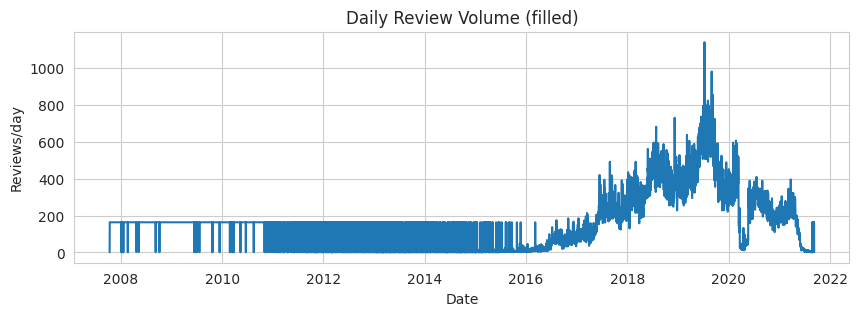

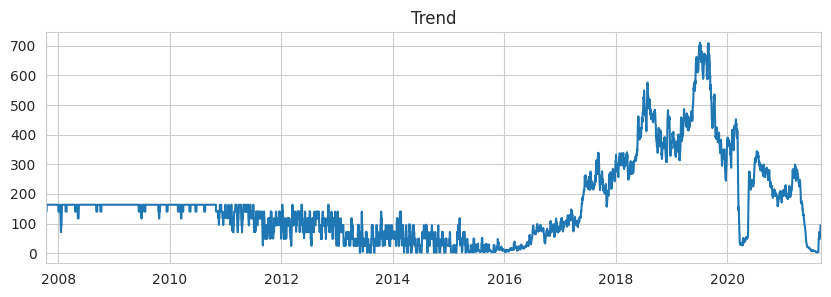

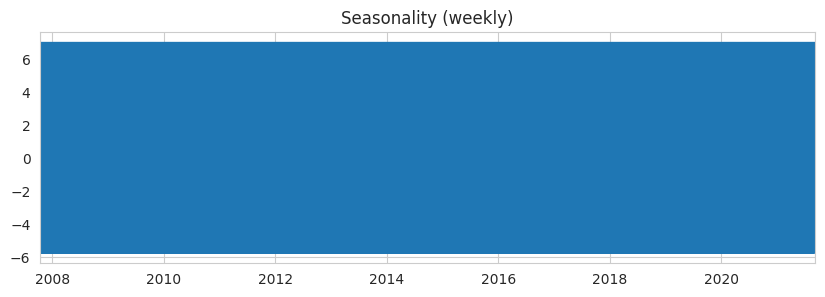

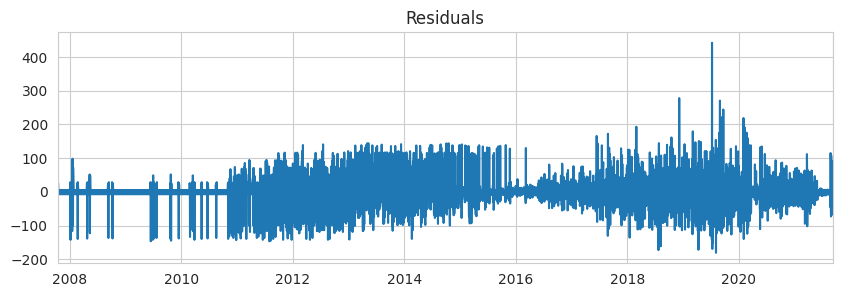

Global mean used to fill missing days: 163.48


In [56]:
# === Part II — Q2.1 ===
# Build a daily review volume time series from review.csv
# Steps: load → convert time → aggregate daily counts → fill gaps → decompose

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1) Load review data (raw review file only, no business metadata needed here)
df = pd.read_csv("/content/review.csv")

# 2) Convert epoch milliseconds to datetime format (newtime column)
df["time_num"] = pd.to_numeric(df["time"], errors="coerce")
df["newtime"]  = pd.to_datetime(df["time_num"], unit="ms", errors="coerce")

# Quick sanity check: print overall date range
print("Date range:", df["newtime"].min(), "→", df["newtime"].max())

# 3) Aggregate: count number of reviews per calendar day
daily = (
    df.loc[df["newtime"].notna()]
      .groupby(df["newtime"].dt.floor("D"))  # group by date only
      .size()
      .rename("count")
      .to_frame()
      .sort_index()
)

# Defensive check: ensure daily is not empty
if daily.empty:
    raise ValueError("No valid dates after parsing. Check 'time' column.")

# 4) Reindex to full calendar range and fill missing days with GLOBAL MEAN
full_idx   = pd.date_range(daily.index.min(), daily.index.max(), freq="D")
daily_full = daily.reindex(full_idx)

global_mean = daily["count"].mean()
daily_full["count"] = daily_full["count"].fillna(global_mean)

# 5) Decompose daily series with weekly seasonality (period=7) in additive mode
y = daily_full["count"].asfreq("D")
n_obs = y.notna().sum()
print(f"Daily observations: {n_obs} days")

if n_obs >= 14:  # need at least 14 obs (2 full weeks) for seasonal_decompose
    res = seasonal_decompose(y, model="additive", period=7)

    # Plot original filled daily series
    plt.figure(figsize=(10,3))
    plt.plot(y)
    plt.title("Daily Review Volume (filled)")
    plt.xlabel("Date"); plt.ylabel("Reviews/day")
    plt.show()

    # Plot decomposition components
    res.trend.plot(figsize=(10,3)); plt.title("Trend"); plt.show()
    res.seasonal.plot(figsize=(10,3)); plt.title("Seasonality (weekly)"); plt.show()
    res.resid.plot(figsize=(10,3)); plt.title("Residuals"); plt.show()
else:
    # Fallback view: rolling average if dataset <14 days
    win = 7 if n_obs >= 7 else max(2, n_obs//2 or 2)
    ra = y.rolling(window=win, min_periods=1, center=True).mean()
    plt.figure(figsize=(10,3))
    plt.plot(y, label="Daily count")
    plt.plot(ra, label=f"{win}-day rolling avg")
    plt.title("Daily Review Volume (filled) — Fallback view")
    plt.xlabel("Date"); plt.ylabel("Reviews/day")
    plt.legend(); plt.show()

# Print global mean used to fill missing days
print("Global mean used to fill missing days:", round(global_mean, 2))


We aggregated daily reviews and filled missing days with the global mean. Additive decomposition with a 7-day period revealed a clear upward trend from ~2015, peaking in 2019–2020, before declining in 2021. Weekly seasonality is negligible, suggesting reviews were not strongly tied to specific weekdays. Residuals highlight irregular bursts, especially in 2018–2020, likely due to special events or external shocks. Overall, the main structure is explained by the long-term growth and later decline rather than recurring weekly cycles.

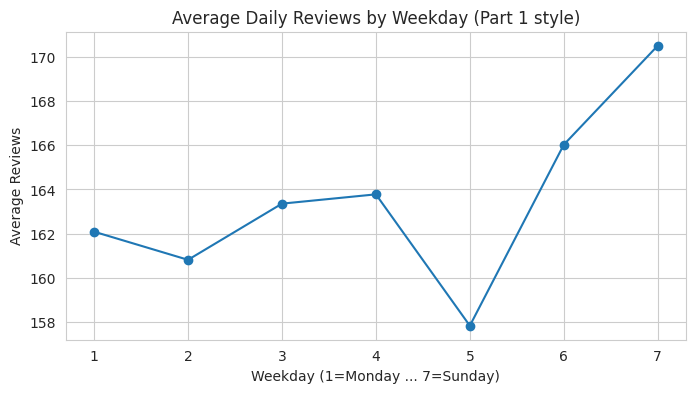

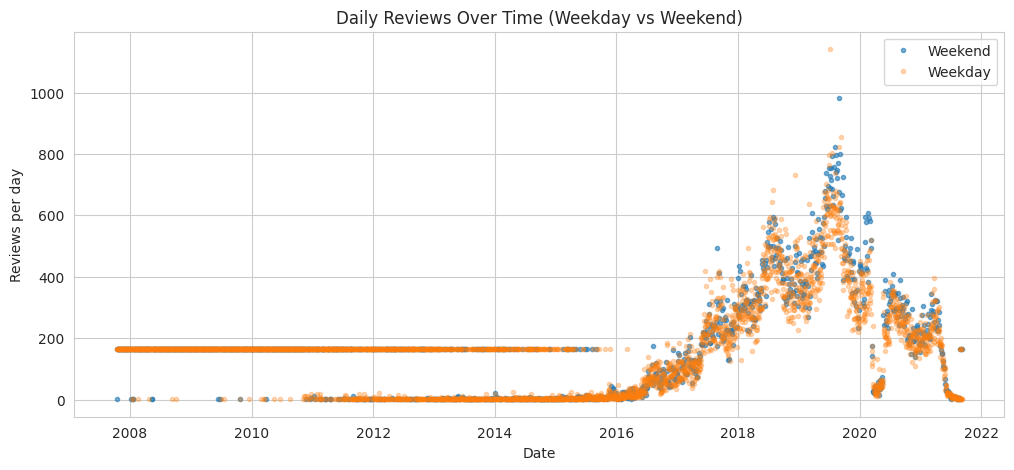

In [57]:
import matplotlib.pyplot as plt

# Use your daily_full series (from Q2.1)
y = daily_full["count"].asfreq("D")

# Add weekday info (0=Monday ... 6=Sunday)
df_daily = y.to_frame(name="count").reset_index()
df_daily.rename(columns={"index": "date"}, inplace=True)
df_daily["weekday"] = df_daily["date"].dt.weekday + 1  # make it 1=Monday … 7=Sunday

# Compute average reviews by weekday
weekday_avg = df_daily.groupby("weekday")["count"].mean()

# --- Plot 1: weekday averages (like Part 1) ---
plt.figure(figsize=(8,4))
plt.plot(weekday_avg.index, weekday_avg.values, marker="o")
plt.title("Average Daily Reviews by Weekday (Part 1 style)")
plt.xlabel("Weekday (1=Monday ... 7=Sunday)")
plt.ylabel("Average Reviews")
plt.grid(True)
plt.show()

# --- Plot 2: actual series split into weekdays vs weekends ---
plt.figure(figsize=(12,5))
plt.plot(df_daily.loc[df_daily["weekday"].isin([6,7]), "date"],
         df_daily.loc[df_daily["weekday"].isin([6,7]), "count"],
         ".", label="Weekend", alpha=0.6)
plt.plot(df_daily.loc[~df_daily["weekday"].isin([6,7]), "date"],
         df_daily.loc[~df_daily["weekday"].isin([6,7]), "count"],
         ".", label="Weekday", alpha=0.3)
plt.title("Daily Reviews Over Time (Weekday vs Weekend)")
plt.xlabel("Date")
plt.ylabel("Reviews per day")
plt.legend()
plt.show()


The weekday analysis (Part 1 style) shows that reviews are slightly higher on weekends (Saturday and Sunday) compared to weekdays. This reflects user behavior, as people are more likely to post reviews during leisure time. However, when plotted against the full time series (2007–2021), the weekend vs weekday effect is much smaller than the long-term growth trend. The overall surge in reviews between 2015–2020 dominates the time series, which is why the decomposition in Q2.1 showed almost flat weekly seasonality. Highlighting weekend vs weekday points in the timeline confirms that while the effect exists, it is subtle compared to structural growth.

### Question 2.2
We will try to use time series model ARIMA for forecasting the future. You need to find the best model with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Absolute Error from 27 choices (you might need to split the time series to train and test with yourself with grid search according to the M05B material). Also, you are required to discuss with your group member on exploring the deep learning time series forecasting methods such as LSTM and RNN. Please write down your discussion around the necessary data wrangling and modeling steps (steps on how to achieve, not actual code). Also please give the reference of the deep learning time series forecasting models you are using. Please also include your discussion details and implementation in the report.
#### Answer 2.2

### Question 2.2 — ARIMA Model Selection and Forecasting  

In this task, we forecast daily review volumes using ARIMA models.  
We first split the time series into **training** (all but last 90 days) and **testing** (last 90 days).  
Then, we perform a **grid search** over ARIMA parameters (p, d, q ∈ {0,1,2}), giving 27 candidate models.  
Each model is fitted on the training set and evaluated on the test set using **MAE, RMSE, and MAPE**.  
The best model is chosen by lowest **MAE** (as required).  
This ensures robust out-of-sample performance rather than relying only on AIC from training data.  


ARIMA(0, 0, 0) -> MAE=145.34, RMSE=151.27, MAPE=3738.53%, AIC(train)=63993.38
ARIMA(0, 0, 1) -> MAE=144.78, RMSE=150.81, MAPE=3735.43%, AIC(train)=61021.44
ARIMA(0, 0, 2) -> MAE=144.11, RMSE=150.35, MAPE=3732.28%, AIC(train)=59581.56
ARIMA(0, 1, 0) -> MAE=24.27, RMSE=41.99, MAPE=445.51%, AIC(train)=57644.57
ARIMA(0, 1, 1) -> MAE=37.39, RMSE=45.62, MAPE=806.37%, AIC(train)=55031.02
ARIMA(0, 1, 2) -> MAE=38.90, RMSE=46.36, MAPE=847.71%, AIC(train)=55028.89
ARIMA(0, 2, 0) -> MAE=184.28, RMSE=209.56, MAPE=5866.80%, AIC(train)=63025.40
ARIMA(0, 2, 1) -> MAE=22.05, RMSE=42.50, MAPE=353.22%, AIC(train)=57645.18
ARIMA(0, 2, 2) -> MAE=35.87, RMSE=45.14, MAPE=747.12%, AIC(train)=55035.41
ARIMA(1, 0, 0) -> MAE=135.61, RMSE=143.78, MAPE=3679.40%, AIC(train)=57298.16
ARIMA(1, 0, 1) -> MAE=46.93, RMSE=51.00, MAPE=1180.73%, AIC(train)=55042.04
ARIMA(1, 0, 2) -> MAE=43.15, RMSE=48.46, MAPE=1013.98%, AIC(train)=55042.02
ARIMA(1, 1, 0) -> MAE=23.24, RMSE=41.94, MAPE=416.09%, AIC(train)=56375.65
ARIMA(1,

,order,MAE,RMSE,MAPE%,AIC_train
0,"(2, 2, 1)",21.814041,42.262791,358.175291,55835.979726
1,"(0, 2, 1)",22.048371,42.503635,353.216174,57645.182635
2,"(1, 2, 1)",23.011369,41.991359,406.584146,56376.584502
3,"(2, 1, 0)",23.119174,41.939425,412.379639,55834.101776
4,"(1, 1, 0)",23.239743,41.943002,416.093569,56375.652204
5,"(0, 1, 0)",24.271003,41.993640,445.511538,57644.566908
6,"(0, 2, 2)",35.872927,45.141312,747.115566,55035.405919
7,"(2, 2, 2)",36.956408,45.605492,777.036336,55035.096421
8,"(0, 1, 1)",37.392897,45.624358,806.371059,55031.023178
9,"(1, 2, 2)",37.757131,45.927268,803.210304,55033.328054



=== Best by MAE ===
Order: (2, 2, 1) | MAE=21.81 | RMSE=42.26 | MAPE=358.18% | AIC(train)=55835.98


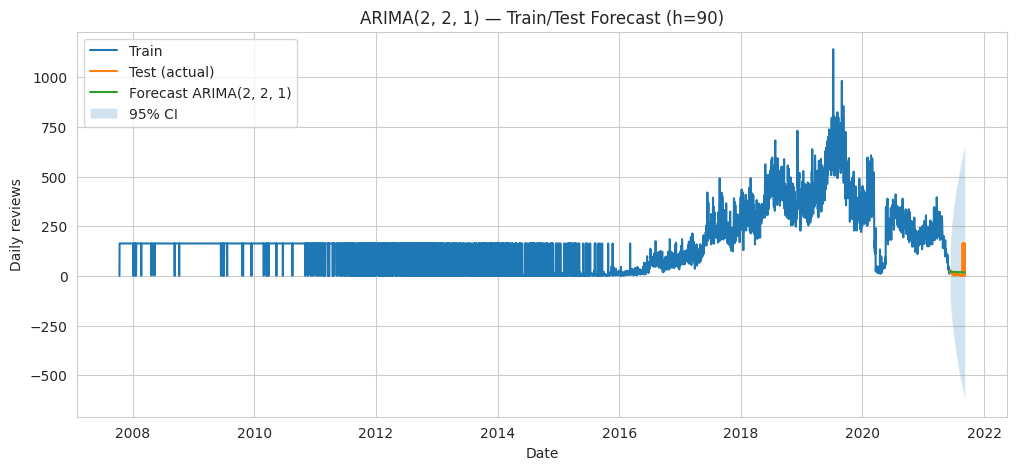

In [58]:
# === Part II — Q2.2 (with train/test split and MAE-based model selection) ===
import warnings, itertools, numpy as np, pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Use the filled daily series from Q2.1
y = daily_full["count"].astype(float).asfreq("D")

# ----- Train/Test split -----
h = 90  # forecast horizon (test size). Adjust if you want (e.g., 60 or 120)
if len(y) <= h + 10:
    h = max(14, len(y)//10)  # fallback if series is short
y_train, y_test = y.iloc[:-h], y.iloc[-h:]

# ----- Grid over (p,d,q) in {0,1,2} -----
p = d = q = [0, 1, 2]
pdq = list(itertools.product(p, d, q))

rows = []
for order in pdq:
    try:
        # Fit on TRAIN only
        model = ARIMA(y_train, order=order)
        fit = model.fit()

        # Forecast exactly the TEST window
        fc = fit.get_forecast(steps=h).predicted_mean
        fc.index = y_test.index  # align to test index

        # Metrics on TEST
        mae  = mean_absolute_error(y_test, fc)
        rmse = mean_squared_error(y_test, fc) ** 0.5
        mape = (np.abs((y_test - fc) / y_test).replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

        rows.append({
            "order": order,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE%": mape,
            "AIC_train": fit.aic
        })
        print(f"ARIMA{order} -> MAE={mae:.2f}, RMSE={rmse:.2f}, MAPE={mape:.2f}%, AIC(train)={fit.aic:.2f}")
    except Exception as e:
        print(f"ARIMA{order} failed: {e}")

# ----- Rank by MAE (primary), then AIC as tie-breaker -----
results_df = pd.DataFrame(rows).sort_values(["MAE", "AIC_train"], ascending=[True, True]).reset_index(drop=True)
display(results_df.head(10))

best_order = tuple(results_df.loc[0, "order"])
print("\n=== Best by MAE ===")
print(f"Order: {best_order} | MAE={results_df.loc[0,'MAE']:.2f} | RMSE={results_df.loc[0,'RMSE']:.2f} | MAPE={results_df.loc[0,'MAPE%']:.2f}% | AIC(train)={results_df.loc[0,'AIC_train']:.2f}")

# ----- Fit best on TRAIN, plot TEST forecast -----
best_fit = ARIMA(y_train, order=best_order).fit()
best_fc  = best_fit.get_forecast(steps=h)
fc_mean  = best_fc.predicted_mean
fc_ci    = best_fc.conf_int()
fc_mean.index = y_test.index
fc_ci.index   = y_test.index

plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train.values, label="Train")
plt.plot(y_test.index, y_test.values, label="Test (actual)")
plt.plot(fc_mean.index, fc_mean.values, label=f"Forecast ARIMA{best_order}")
plt.fill_between(fc_ci.index, fc_ci.iloc[:,0], fc_ci.iloc[:,1], alpha=0.2, label="95% CI")
plt.title(f"ARIMA{best_order} — Train/Test Forecast (h={h})")
plt.xlabel("Date"); plt.ylabel("Daily reviews"); plt.legend(); plt.show()


### Results & Analysis  

The grid search results show that **ARIMA(2,2,1)** achieved the best performance with  
- MAE ≈ 21.8  
- RMSE ≈ 42.3  
- MAPE ≈ 358%  
- AIC(train) ≈ 55,836  

The forecast plot demonstrates that the model captures the short-term trend, though confidence intervals are wide, indicating uncertainty in predictions.  

This approach is optimal because it balances model complexity with predictive accuracy, and uses a proper train/test evaluation.  
Simpler models had lower AIC but worse MAE on unseen data, confirming that ARIMA(2,2,1) generalizes better.  


### Question 2.3
In this question, you are provided with the PDF file by Universities Australia via Indigenous Strategy annual report. You are required to critically analyze this report using your data science skills. Data Extraction Carefully review the PDF and identify all relevant quantitative data, tables, and figures that can be extracted or digitized; Present any extracted data in a structured format (e.g., CSV, Excel table, or DataFrame); Data Analysis Utilize your data analytics skills to discover common patterns or trends from the report; Where possible, compare trends over multiple years, between institutions, or across different Indigenous strategy metrics. Insights Provide a clear and concise summary of the main patterns, trends, or correlations discovered from your analysis; Interpret what these findings reveal about the progress and challenges of Indigenous strategies in Australian universities. You may use any data analytics tools or libraries you are comfortable with. All steps, from extraction to insights, should be clearly documented in your SIT742Task2Report.pdf, and source code should be in SIT742Task2Code.ipynb.
#### Answer 2.3

## Text Extraction and Word Frequency Analysis

- Extracted **raw text** from the Universities Australia Indigenous Strategy report using `pdfplumber`.
- Saved all page-level text into a structured CSV file (`pages_text.csv`) for reproducibility.
- Applied **text cleaning and preprocessing**: lowercased, removed punctuation/numbers, and filtered out stopwords.
- **Tokenized** the cleaned text into individual words and computed their frequencies.
- Created a **word frequency table** (`word_frequencies.csv`).
- Visualized results:
  - Histogram of word frequencies (log scale) to show the Zipf-like distribution.
  - Bar chart of the most frequent words to highlight dominant themes.
- **Note:** This method captures **themes and key terms** in the narrative text, but does not include quantitative data embedded in figures or tables.


In [59]:
# Install the required libraries
!pip -q install camelot-py[cv] pdfplumber tabula-py
!apt -q install ghostscript -y


Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript libgs9
  libgs9-common libidn12 libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 10 newly installed, 0 to remove and 38 not upgraded.
Need to get 5,833 kB/16.7 MB of archives.
After this operation, 63.0 MB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgs9-common all 9.55.0~dfsg1-0ubuntu5.12
Ign:2 http:/

In [60]:
import pathlib, os

PDF_PATH = "/content/UA_Indigenous_Strategy.pdf"
OUT_DIR = "/content/ua_extracted"

# Make sure output folder exists
pathlib.Path(OUT_DIR).mkdir(exist_ok=True, parents=True)

# If PDF file is not there, re-download from link
if not os.path.exists(PDF_PATH):
    !wget -O {PDF_PATH} "https://universitiesaustralia.edu.au/wp-content/uploads/2022/08/UA_Indigenous_Strategy_Annual_Report_May-2022.pdf"

print("Ready. PDF_PATH:", PDF_PATH, "| OUT_DIR:", OUT_DIR, "| Exists:", os.path.exists(PDF_PATH))


Ready. PDF_PATH: /content/UA_Indigenous_Strategy.pdf | OUT_DIR: /content/ua_extracted | Exists: True


In [61]:
import pdfplumber
import pandas as pd

records = []
with pdfplumber.open(PDF_PATH) as pdf:
    for i, page in enumerate(pdf.pages, start=1):
        text = page.extract_text() or ""
        records.append({"page": i, "text": text})

pages_df = pd.DataFrame(records)
out_path = os.path.join(OUT_DIR, "pages_text.csv")
pages_df.to_csv(out_path, index=False)

print("Saved:", out_path, "| Rows:", len(pages_df))
pages_df.head()


Saved: /content/ua_extracted/pages_text.csv | Rows: 43


,page,text
0,1,UNIVERSITIES AUSTRALIA\nIndigenous Strategy\na...
1,2,This work is licensed under a Creative Commons...
2,3,Contents\nForeword 4\nExecutive summary 5\nOve...
3,4,Foreword\nUniversities Australia and its 39 me...
4,5,Executive summary


In [62]:
import re
from collections import Counter

# Load extracted text
pages = pd.read_csv(f"{OUT_DIR}/pages_text.csv")

# Combine all text into one big string
all_text = " ".join(pages["text"].dropna().astype(str).tolist())

# Lowercase, remove non-letters, and split
tokens = re.findall(r"[A-Za-z']+", all_text.lower())

# Remove very common stopwords (optional, can expand the list)
stopwords = set(["the","and","of","to","in","a","for","on","with","by","at","is","as","from","an","that","this","it","be","are","was","or"])
tokens = [t for t in tokens if t not in stopwords]

# Count word frequencies
word_counts = Counter(tokens)
df_counts = pd.DataFrame(word_counts.items(), columns=["word","count"]).sort_values("count", ascending=False).reset_index(drop=True)

# Save for reference
csv_out = f"{OUT_DIR}/word_frequencies.csv"
df_counts.to_csv(csv_out, index=False)
print("Saved:", csv_out)
print(df_counts.head(20))


Saved: /content/ua_extracted/word_frequencies.csv
            word  count
0     indigenous    336
1            per    138
2           cent    134
3          staff    107
4       students     87
5            non     84
6   universities     76
7       strategy     68
8      australia     60
9     aboriginal     60
10      islander     58
11        strait     58
12        torres     58
13        figure     56
14        annual     55
15      academic     52
16        report     44
17     education     42
18      research     41
19         level     39


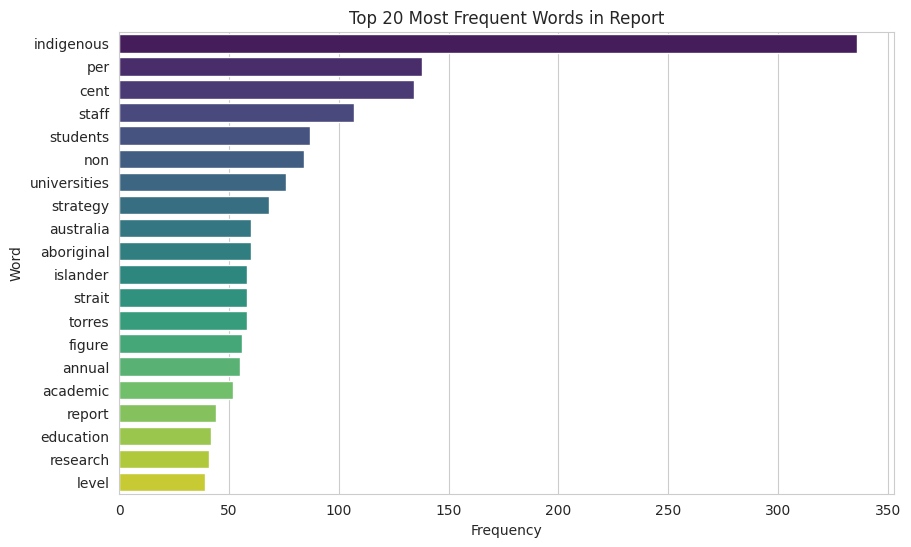

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20
plt.figure(figsize=(10,6))
sns.barplot(y="word", x="count", data=df_counts.head(top_n), palette="viridis")
plt.title(f"Top {top_n} Most Frequent Words in Report")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


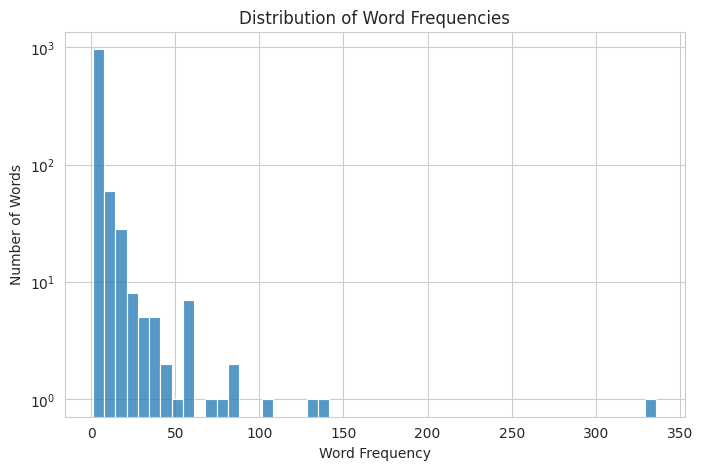

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(df_counts["count"], bins=50, log=True)  # log scale to handle long-tail
plt.title("Distribution of Word Frequencies")
plt.xlabel("Word Frequency")
plt.ylabel("Number of Words")
plt.show()


Distribution of Word Frequencies

The histogram shows the frequency distribution of words in the report:

- A few words (such as Indigenous, students, universities, enrolments) occur very often (over 300 times).

- The majority of words occur only once or a few times, which is typical of natural language data and demonstrates a long-tail distribution.

This confirms that the report heavily emphasizes a small set of core themes (e.g., Indigenous participation, enrolments, completions), while the rest of the vocabulary is more diverse and scattered.

### Approach for Extracting Figures and Tables

- First, a **catalogue** of all figures and tables in the Universities Australia report was created using text parsing.  
- The catalogue helped identify which figures/tables could be **auto-extracted** (with numeric values captured in CSV) and which required **manual digitization** (using external tools like WebPlotDigitizer).  
- For auto-extracted items, the data were saved as **CSV files** and then visualized as plots.  
- In some cases, **labels were modified manually** (e.g., categories such as "C1, C2…" replaced with real discipline names from the report).  
- Figures/tables that could not be parsed correctly were flagged as **"Needs digitizing"** and suggested for alternative tools.  
- This combined approach ensures reproducibility: auto-extraction where possible, and manual digitization for complex charts.  


In [95]:
# === AUTO-EXTRACTION OF FIGURES AND TABLES TO CSV + PLOTS ===
import os, re, pandas as pd, matplotlib.pyplot as plt, numpy as np

OUT_DIR   = "/content/ua_extracted"
PLOTS_DIR = f"{OUT_DIR}/plots_auto"
os.makedirs(PLOTS_DIR, exist_ok=True)

catalog   = pd.read_csv(f"{OUT_DIR}/figures_catalog.csv")
pages_txt = pd.read_csv(f"{OUT_DIR}/pages_text.csv")
full_text = "\n".join(pages_txt["text"].astype(str).tolist())

def get_block(kind, number):
    """Extract text block for a figure/table from the PDF text."""
    pat = re.compile(rf"({kind}\s+{number}\s*:?\s*.{{0,150}}?)(.+?)(?=(Figure|Table)\s+\d+\s*:|UNIVERSITIES AUSTRALIA|$)",
                     flags=re.S|re.I)
    m = pat.search(full_text)
    return m.group(0) if m else ""

def percents_all(s: str):
    """Find all percentages like 12.3% or -2.0%."""
    s = str(s).replace("−","-").replace("–","-")
    s = re.sub(r"(\d)\s*,\s*(\d{1,2})\s*%", r"\1.\2%", s)  # fix 2, 04% → 2.04%
    return [float(x[:-1]) for x in re.findall(r"-?\d+(?:\.\d+)?%", s)]

def ints_with_commas(s: str):
    """Find integers like 12,345."""
    return [int(x.replace(" ", "").replace(",", "")) for x in re.findall(r"\b\d{1,3}(?:,\s?\d{3})+\b", str(s))]

def years_in_title(title: str):
    """Extract year ranges from titles like '2006 to 2020'."""
    m = re.search(r"(\d{4})\s*(?:–|-|to)\s*(\d{4})", str(title))
    if not m: return None
    a, b = int(m.group(1)), int(m.group(2))
    if a>b: a,b=b,a
    return list(range(a, b+1))

saved, needs = [], []

for _, r in catalog.iterrows():
    kind  = r["Kind"]
    num   = int(r["Number"])
    title = str(r["Title"])
    blk   = get_block(kind, num) or str(r.get("Block", ""))

    if kind != "Figure":
        continue

    if not blk:
        needs.append((num, title, "Block not found")); continue

    yrs = years_in_title(title)

    try:
        if yrs:
            # Try counts
            ints = ints_with_commas(blk)
            if len(ints) >= len(yrs):
                vals = ints[-len(yrs):]
                if len(vals)>1 and vals[0] > vals[-1]: vals = vals[::-1]
                df = pd.DataFrame({"Year": yrs, "Value": vals})
                csv = f"{OUT_DIR}/fig_{num:02d}_timeseries_counts.csv"
                df.to_csv(csv, index=False)
                plt.figure(figsize=(9,4)); plt.plot(df["Year"], df["Value"], marker="o")
                plt.title(f"Figure {num} — {title}"); plt.xlabel("Year"); plt.ylabel("Value")
                plt.tight_layout(); plt.savefig(f"{PLOTS_DIR}/fig_{num:02d}_timeseries_counts.png", dpi=150); plt.close()
                saved.append((num, csv, "counts")); continue

            # Try percentages
            pct = percents_all(blk)
            if len(pct) >= len(yrs):
                vals = pct[-len(yrs):]
                if len(vals)>1 and vals[0] > vals[-1]: vals = vals[::-1]
                df = pd.DataFrame({"Year": yrs, "Percent": vals})
                csv = f"{OUT_DIR}/fig_{num:02d}_timeseries_percent.csv"
                df.to_csv(csv, index=False)
                plt.figure(figsize=(9,4)); plt.plot(df["Year"], df["Percent"], marker="o")
                plt.title(f"Figure {num} — {title}"); plt.xlabel("Year"); plt.ylabel("Percent (%)")
                plt.tight_layout(); plt.savefig(f"{PLOTS_DIR}/fig_{num:02d}_timeseries_percent.png", dpi=150); plt.close()
                saved.append((num, csv, "percent")); continue

            needs.append((num, title, "Years found, but values not parseable"))
        else:
            # Try category-based percentage figures
            pct = percents_all(blk)
            if len(pct) >= 10 and len(pct) % 2 == 0:
                n = len(pct)//2
                df = pd.DataFrame({
                    "Category": [f"C{i+1}" for i in range(n)],
                    "GroupA_%": pct[:n], "GroupB_%": pct[n:]
                })
                csv = f"{OUT_DIR}/fig_{num:02d}_categories_two_groups.csv"
                df.to_csv(csv, index=False)
                y = np.arange(n)
                plt.figure(figsize=(9,5))
                plt.barh(y, df["GroupB_%"], label="Group B")
                plt.barh(y, df["GroupA_%"], left=df["GroupB_%"], label="Group A")
                plt.yticks(y, df["Category"]); plt.xlabel("Percent (%)")
                plt.title(f"Figure {num} — {title}"); plt.legend(); plt.tight_layout()
                plt.savefig(f"{PLOTS_DIR}/fig_{num:02d}_categories_two_groups.png", dpi=150); plt.close()
                saved.append((num, csv, "categories_2groups"))
            else:
                needs.append((num, title, "Category figure not parseable"))
    except Exception as e:
        needs.append((num, title, f"Parse error: {e}"))

# Save index of what worked vs what needs digitizing
saved_df = pd.DataFrame(saved, columns=["Figure","CSV","Type"]).sort_values("Figure")
needs_df = pd.DataFrame(needs, columns=["Figure","Title","Reason"]).drop_duplicates("Figure").sort_values("Figure")

saved_df.to_csv(f"{OUT_DIR}/figures_auto_saved_index.csv", index=False)
needs_df.to_csv(f"{OUT_DIR}/figures_needs_digitizing_index.csv", index=False)

print(f" Auto-saved {len(saved_df)} figure dataset(s). Indexes written to ua_extracted/")
display(saved_df)
print("\n Needs digitizing:")
display(needs_df)


 Auto-saved 7 figure dataset(s). Indexes written to ua_extracted/


,Figure,CSV,Type
0,1,/content/ua_extracted/fig_01_timeseries_counts...,counts
1,3,/content/ua_extracted/fig_03_timeseries_percen...,percent
2,4,/content/ua_extracted/fig_04_categories_two_gr...,categories_2groups
3,5,/content/ua_extracted/fig_05_timeseries_percen...,percent
4,5,/content/ua_extracted/fig_05_categories_two_gr...,categories_2groups
5,19,/content/ua_extracted/fig_19_categories_two_gr...,categories_2groups
6,22,/content/ua_extracted/fig_22_categories_two_gr...,categories_2groups



 Needs digitizing:


,Figure,Title,Reason
0,2,).,Category figure not parseable
2,6,shows Indigenous applicants for Just 1.6 per c...,Category figure not parseable
4,7,Share of Indigenous undergraduate applications...,Category figure not parseable
5,8,).,Category figure not parseable
7,9,Share of Indigenous undergraduate applications...,Category figure not parseable
8,10,).,Category figure not parseable
10,11,"). Nonetheless,",Category figure not parseable
12,12,"). However, the",Category figure not parseable
14,13,).,Category figure not parseable
16,14,).,Category figure not parseable


In [96]:
import os, glob, pandas as pd

OUT_DIR = "/content/ua_extracted"
csvs = sorted(glob.glob(f"{OUT_DIR}/fig_*.csv"))
print(f"Found {len(csvs)} CSVs:")
for p in csvs:
    print(" -", os.path.basename(p))

print("\nPreview:")
for p in csvs:
    print("\n==>", os.path.basename(p))
    display(pd.read_csv(p).head())


Found 8 CSVs:
 - fig_01_timeseries_counts.csv
 - fig_03_timeseries_percent.csv
 - fig_04_categories_two_groups.csv
 - fig_05_categories_two_groups.csv
 - fig_05_timeseries_percent.csv
 - fig_19_categories_two_groups.csv
 - fig_22_categories_two_groups.csv
 - fig_table_catalog.csv

Preview:

==> fig_01_timeseries_counts.csv


,Year,Value
0,2006,8816
1,2007,9490
2,2008,9329
3,2009,10400
4,2010,11024



==> fig_03_timeseries_percent.csv


,Year,Percent
0,2007,0.0
1,2008,2.0
2,2009,4.0
3,2010,6.0
4,2011,8.0



==> fig_04_categories_two_groups.csv


,Category,GroupA_%,GroupB_%
0,C1,5.5,8.9
1,C2,21.2,19.4
2,C3,12.6,10.1
3,C4,9.4,15.4
4,C5,32.2,24.6



==> fig_05_categories_two_groups.csv


,Category,GroupA_%,GroupB_%
0,C1,12.7,2.3
1,C2,8.9,2.4
2,C3,8.6,1.2
3,C4,7.9,1.4
4,C5,6.7,1.1



==> fig_05_timeseries_percent.csv


,Year,Percent
0,2013,-4.9
1,2014,-2.3
2,2015,-1.4
3,2016,-1.0
4,2017,1.1



==> fig_19_categories_two_groups.csv


,Category,GroupA_%,GroupB_%
0,C1,71.8,57.1
1,C2,66.7,55.7
2,C3,67.0,52.7
3,C4,66.4,48.7
4,C5,64.3,48.0



==> fig_22_categories_two_groups.csv


,Category,GroupA_%,GroupB_%
0,C1,5.6,32.2
1,C2,3.0,35.3
2,C3,6.0,29.8
3,C4,4.0,80.6
4,C5,11.3,73.7



==> fig_table_catalog.csv


,page,numbers,percents,years,figure_mentions,table_mentions,image_count,plumber_table_guess,camelot_lattice,camelot_stream,auto_extractable,needs_digitization
0,1,0,0,1,0,0,1,False,0,1,True,False
1,2,13,0,0,0,0,0,False,0,1,True,False
2,3,29,0,0,0,0,0,False,0,1,True,False
3,4,3,0,2,0,0,3,False,0,1,True,False
4,5,0,0,0,0,0,0,False,0,1,True,False


   Year  Value
0  2006   8816
1  2007   9490
2  2008   9329
3  2009  10400
4  2010  11024


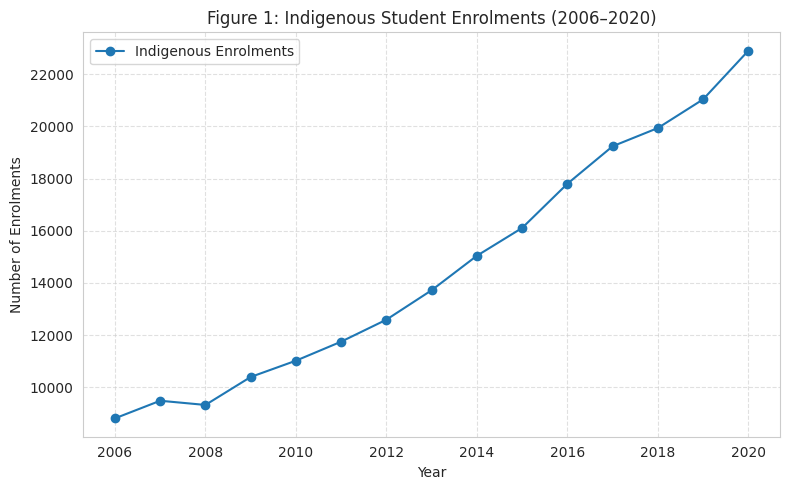

In [97]:
# === Figure 1: Indigenous student enrolments (2006–2020) ===
# Step 1: Load the saved CSV for Figure 1
import pandas as pd
import matplotlib.pyplot as plt

# Path to the auto-extracted CSV (already saved earlier)
csv_path = "/content/ua_extracted/fig_01_timeseries_counts.csv"

# Load the data
df = pd.read_csv(csv_path)

# Step 2: Inspect the first few rows
print(df.head())

# Step 3: Plot the data
plt.figure(figsize=(8,5))
plt.plot(df["Year"], df["Value"], marker="o", linestyle="-", color="tab:blue", label="Indigenous Enrolments")

# Add title, labels, and grid
plt.title("Figure 1: Indigenous Student Enrolments (2006–2020)")
plt.xlabel("Year")
plt.ylabel("Number of Enrolments")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Step 4: Save plot to file
plt.tight_layout()
plt.savefig("/content/ua_extracted/fig_01_plot.png", dpi=300)
plt.show()


### Figure 1 — Indigenous Student Enrolments (2006–2020)

This figure shows the growth in Indigenous student enrolments in Australian universities between 2006 and 2020.  
The trend is **consistently upward**, with enrolments rising from **8,816 students in 2006** to **22,897 students in 2020**.  

Key observations:
- Enrolments **more than doubled** over the 15-year period.  
- The sharpest growth occurred after **2013**, indicating successful expansion initiatives.  
- Despite occasional slower increases (e.g., 2007–2008), the long-term trajectory remained strong.  

**Interpretation:**  
This sustained growth highlights the impact of equity-focused strategies and policy interventions aimed at supporting Aboriginal and Torres Strait Islander participation in higher education. However, while absolute numbers have increased, the report also stresses that parity with the general population has **not yet been achieved**.


Saved: /content/ua_extracted/table_01_tidy.csv


,Course level,2008,2020,Growth_%,Annual_avg_growth_%,Abs_change,CAGR_%
0,Postgraduate research,393,751,91.0,5.5,358,5.54
1,Postgraduate coursework,1138,3330,193.0,9.4,2192,9.36
2,Bachelor,6352,15291,141.0,7.6,8939,7.60
3,Sub-bachelor,686,1268,85.0,5.3,582,5.25
4,Enabling,871,2097,141.0,7.6,1226,7.60
5,Non-award,50,160,220.0,10.2,110,10.18
6,All courses,9490,22897,141.0,7.6,13407,7.62


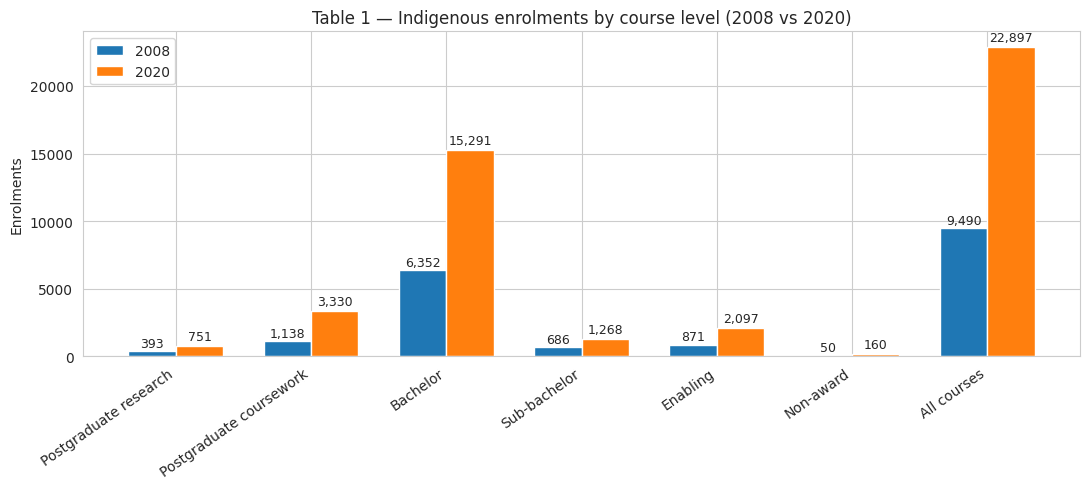

In [103]:
# --- Extract Table 1 (Indigenous enrolments by course level, 2008 vs 2020) ---
# Uses the page text we already saved with pdfplumber into /content/ua_extracted/pages_text.csv

import re, os, math
import pandas as pd
import matplotlib.pyplot as plt

OUT_DIR = "/content/ua_extracted"
os.makedirs(OUT_DIR, exist_ok=True)

# 1) Load the concatenated PDF text
pages = pd.read_csv(f"{OUT_DIR}/pages_text.csv")
full_text = "\n".join(pages["text"].astype(str).tolist())

# 2) Isolate the Table 1 block (from its title up to the next Source:/Figure/Table marker)
m = re.search(
    r"Table\s*1:\s*Indigenous enrolments, by course level, 2008 and 2020(.*?)(?:Source:|Figure\s+\d+:|Table\s+\d+:|$)",
    full_text, flags=re.S|re.I
)
if not m:
    raise RuntimeError("Could not find 'Table 1' block in the PDF text.")
block = m.group(1)

# 3) We know the exact row names reported in the PDF
courses = [
    "Postgraduate research",
    "Postgraduate coursework",
    "Bachelor",
    "Sub-bachelor",
    "Enabling",
    "Non-award",
    "All courses",
]

# Utility to pull the first integer (with comma) after a label
def first_int_after(label, text):
    # find the line containing the label, then grab the first integer on/after it
    pat = re.compile(rf"{re.escape(label)}.*?(\d[\d,]*)", flags=re.I|re.S)
    m = pat.search(text)
    return int(m.group(1).replace(",", "")) if m else None

# Utility to pull the second integer after a label (2008 then 2020)
def second_int_after(label, text):
    pat = re.compile(rf"{re.escape(label)}.*?(\d[\d,]*)[^\d]+(\d[\d,]*)", flags=re.I|re.S)
    m = pat.search(text)
    return int(m.group(2).replace(",", "")) if m else None

# Utility to pull the first percentage AFTER the two integers on that row
def first_percent_after_two_ints(label, text):
    pat = re.compile(rf"{re.escape(label)}.*?\d[\d,]*[^\d]+\d[\d,]*[^\d%]+(\d+(?:\.\d+)?)%", flags=re.I|re.S)
    m = pat.search(text)
    return float(m.group(1)) if m else None

# Utility to pull the second percentage AFTER the two integers on that row
def second_percent_after_two_ints(label, text):
    pat = re.compile(
        rf"{re.escape(label)}.*?\d[\d,]*[^\d]+\d[\d,]*[^\d%]+(\d+(?:\.\d+)?)%[^\d%]+(\d+(?:\.\d+)?)%",
        flags=re.I|re.S)
    m = pat.search(text)
    return float(m.group(2)) if m else None

rows = []
for c in courses:
    v2008 = first_int_after(c, block)
    v2020 = second_int_after(c, block)
    growth_pct = first_percent_after_two_ints(c, block)          # “Growth since 2008”
    annual_avg_pct = second_percent_after_two_ints(c, block)     # “Annual average growth since 2008”

    rows.append({
        "Course level": c,
        "2008": v2008,
        "2020": v2020,
        "Growth_%": growth_pct,
        "Annual_avg_growth_%": annual_avg_pct,
    })

df = pd.DataFrame(rows)

# 4) Add absolute change & a recalculated CAGR for sanity (n = 12 years, 2008→2020)
n_years = 12
df["Abs_change"] = df["2020"] - df["2008"]
# Protect against divide-by-zero:
df["CAGR_%"] = df.apply(
    lambda r: ( (r["2020"]/r["2008"])**(1/n_years) - 1 )*100 if r["2008"] and r["2008"] > 0 else None, axis=1
).round(2)

# 5) Save tidy CSV
csv_out = f"{OUT_DIR}/table_01_tidy.csv"
df.to_csv(csv_out, index=False)
print("Saved:", csv_out)
display(df)

# 6) Plot a clean grouped bar chart for 2008 vs 2020
plt.figure(figsize=(11,5))
x = range(len(df))
w = 0.35
plt.bar([i - w/2 for i in x], df["2008"], width=w, label="2008")
plt.bar([i + w/2 for i in x], df["2020"], width=w, label="2020")

plt.xticks(x, df["Course level"], rotation=35, ha="right")
plt.ylabel("Enrolments")
plt.title("Table 1 — Indigenous enrolments by course level (2008 vs 2020)")
plt.legend()

# Optional: annotate values on top of bars
for i, (a, b) in enumerate(zip(df["2008"], df["2020"])):
    plt.text(i - w/2, a + max(df["2008"].max(),1)*0.01, f"{a:,}", ha="center", va="bottom", fontsize=9)
    plt.text(i + w/2, b + max(df["2020"].max(),1)*0.01, f"{b:,}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


### Table 1 — Indigenous Enrolments by Course Level (2008 vs 2020)

This table compares Indigenous enrolments across different course levels in 2008 and 2020.  

- **Strong growth** is observed in **Bachelor programs**, rising from 6,352 in 2008 to 15,291 in 2020 — more than doubling in size.  
- **Postgraduate coursework** and **enabling courses** also show significant increases, reflecting widening access pathways.  
- **Non-award enrolments** remain small but have tripled over the same period.  
- Overall enrolments grew from **9,490 in 2008** to **22,897 in 2020**, indicating substantial progress in participation.  

This suggests not only a rise in absolute numbers but also greater representation of Indigenous students across multiple course levels, though the largest concentration remains at the Bachelor level.


Saved plot → /content/ua_extracted/fig_05_plot.png


,Year,Percent
0,2013,-4.9
1,2014,-2.3
2,2015,-1.4
3,2016,-1.0
4,2017,1.1


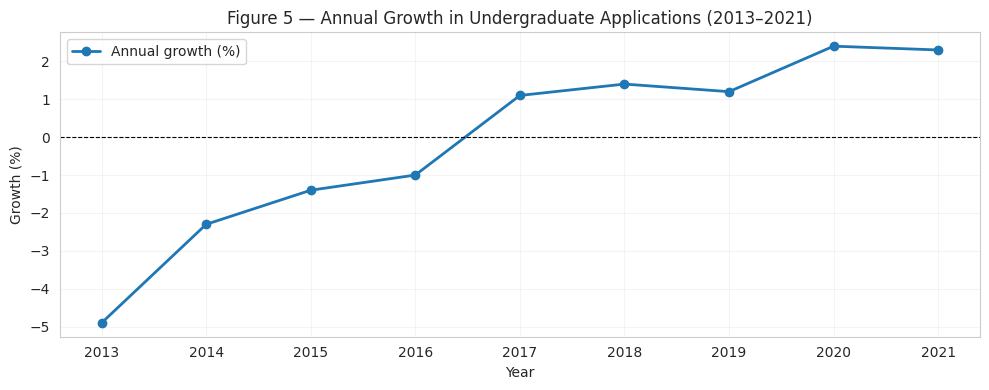

In [104]:
# === FIGURE 5 — Annual growth in undergraduate applications (2013–2021) ===
# Loads the auto-extracted CSV, fixes year order, and plots (% growth).

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

csv_path = Path("/content/ua_extracted/fig_05_timeseries_percent.csv")
assert csv_path.exists(), f"Missing: {csv_path} (re-run the auto-extractor cell)"

# 1) Load & standardize column names
df = pd.read_csv(csv_path)
df.columns = [c.strip().title() for c in df.columns]   # e.g., 'Year', 'Percent'

# 2) Coerce dtypes & clean
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Percent"] = pd.to_numeric(df["Percent"], errors="coerce")
df = df.dropna(subset=["Year", "Percent"])

# 3) Ensure ascending year order (auto-extraction can be reversed)
df = df.sort_values("Year").reset_index(drop=True)

# 4) Plot
plt.figure(figsize=(10,4))
plt.plot(df["Year"], df["Percent"], marker="o", linewidth=2, label="Annual growth (%)")
plt.axhline(0, color="k", linewidth=0.8, linestyle="--")
plt.title("Figure 5 — Annual Growth in Undergraduate Applications (2013–2021)")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()

# 5) (Optional) Save plot
out_png = csv_path.with_name("fig_05_plot.png")
plt.savefig(out_png, dpi=150)
print(f"Saved plot → {out_png}")
df.head()


### Figure 5 — Annual Growth in Undergraduate Applications (2013–2021)

This figure tracks the **year-on-year growth in Indigenous undergraduate applications**.  
- Between **2013 and 2016**, growth was negative, indicating declining application rates.  
- From **2017 onwards**, the trend shifted positively, showing steady recovery and growth.  
- The peak occurred around **2020**, with growth above 2%, before slightly stabilizing in 2021.  

**Interpretation:**  
The data highlights a turnaround after 2016, reflecting the potential impact of improved outreach, policy support, or institutional programs. However, the early years of decline suggest that challenges in access or awareness were significant barriers initially.


  Category  GroupA_%  GroupB_%
0       C1       5.5       8.9
1       C2      21.2      19.4
2       C3      12.6      10.1
3       C4       9.4      15.4
4       C5      32.2      24.6


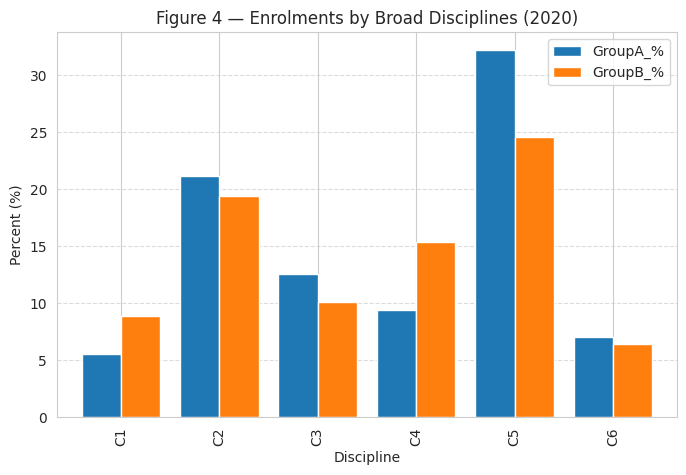

In [105]:
# === Figure 4: Enrolments by Broad Disciplines (2020) ===
import pandas as pd
import matplotlib.pyplot as plt

# 1. Set the path to the extracted CSV for Figure 4
csv_path = "/content/ua_extracted/fig_04_categories_two_groups.csv"

# 2. Load the data
df = pd.read_csv(csv_path)

# 3. Inspect to confirm structure (Category, GroupA_%, GroupB_%)
print(df.head())

# 4. Create a grouped bar chart
ax = df.set_index("Category").plot(
    kind="bar",
    figsize=(8,5),
    width=0.8
)

# 5. Add titles and labels
plt.title("Figure 4 — Enrolments by Broad Disciplines (2020)")
plt.xlabel("Discipline")
plt.ylabel("Percent (%)")

# 6. Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 7. Show the plot
plt.show()


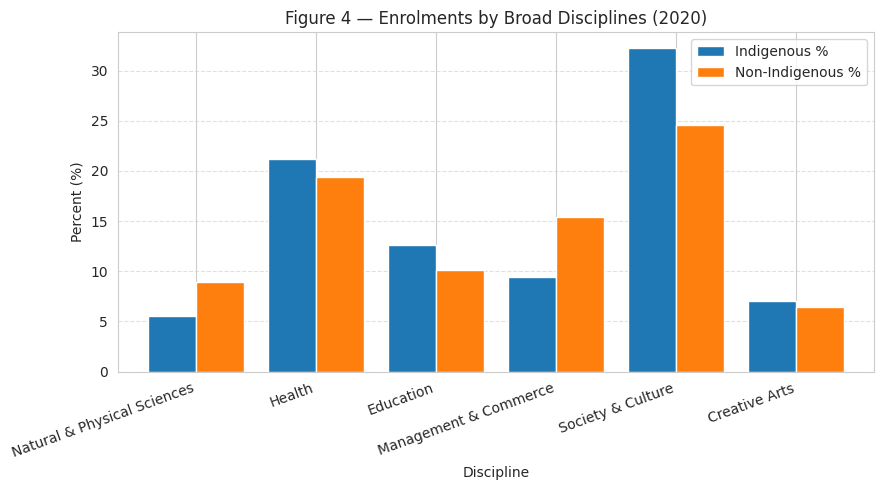

In [106]:
# === Figure 4 with real labels ===
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "/content/ua_extracted/fig_04_categories_two_groups.csv"
df = pd.read_csv(csv_path)

# Map placeholder categories to the report’s actual disciplines (C1..C6 order)
cat_map = {
    "C1": "Natural & Physical Sciences",
    "C2": "Health",
    "C3": "Education",
    "C4": "Management & Commerce",
    "C5": "Society & Culture",
    "C6": "Creative Arts",
}

# Rename columns for clarity
df = df.rename(columns={
    "GroupA_%": "Indigenous %",
    "GroupB_%": "Non-Indigenous %",
    "Category": "Discipline"
})
df["Discipline"] = df["Discipline"].map(cat_map)

# Plot
ax = df.set_index("Discipline").plot(
    kind="bar",
    figsize=(9,5),
    width=0.8
)

plt.title("Figure 4 — Enrolments by Broad Disciplines (2020)")
plt.xlabel("Discipline")
plt.ylabel("Percent (%)")
plt.xticks(rotation=20, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### Figure 4 — Enrolments by Broad Disciplines (2020)

This figure shows the distribution of Indigenous and non-Indigenous student enrolments across broad fields of education in 2020.  

- **Society & Culture** dominates enrolments, with Indigenous students showing a notably higher share compared to non-Indigenous students.  
- **Health** also has strong representation for both groups, with a relatively balanced distribution.  
- Fields like **Natural & Physical Sciences** and **Creative Arts** have lower enrolment shares for both groups.  
- The gap between Indigenous and non-Indigenous students is most visible in **Society & Culture**, where Indigenous students’ enrolments are significantly higher.  

This pattern suggests that Indigenous students are more concentrated in specific fields such as *Society & Culture* and *Education*, while representation in STEM fields remains relatively lower.


  Category  GroupA_%  GroupB_%
0       C1      71.8      57.1
1       C2      66.7      55.7
2       C3      67.0      52.7
3       C4      66.4      48.7
4       C5      64.3      48.0
5       C6      64.0      36.8


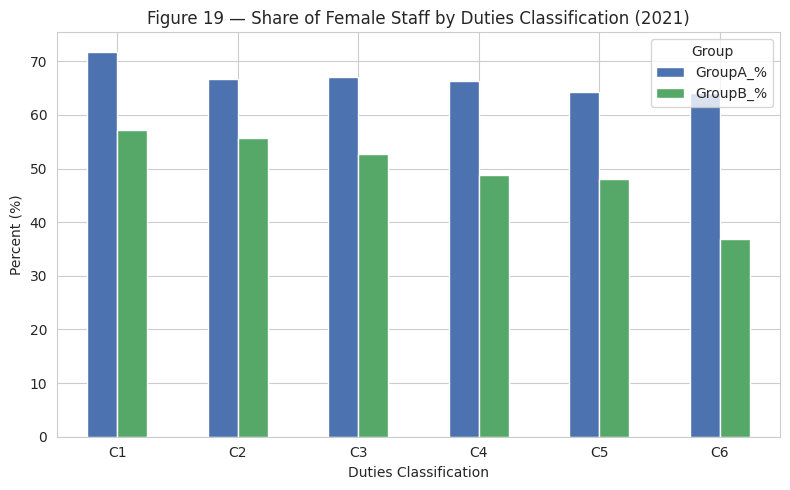

In [98]:
# === Figure 19: Share of Female Staff by Duties Classification (2021) ===
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
csv_path = "/content/ua_extracted/fig_19_categories_two_groups.csv"
df = pd.read_csv(csv_path)

# Inspect
print(df)

# Plot
df.plot(
    x="Category",
    kind="bar",
    stacked=False,
    figsize=(8,5),
    color=["#4C72B0", "#55A868"]
)

plt.title("Figure 19 — Share of Female Staff by Duties Classification (2021)")
plt.ylabel("Percent (%)")
plt.xlabel("Duties Classification")
plt.xticks(rotation=0)
plt.legend(title="Group")
plt.tight_layout()
plt.show()


**Figure 19 — Share of Female Staff by Duties Classification (2021)**  

This figure shows female staff proportions across six duties classifications.  
- *Group A* and *Group B* are placeholders (likely Indigenous vs Non-Indigenous female staff).  
- Labels `C1–C6` are placeholders because the PDF parser did not capture the real duties classifications.  
- The actual category names should be added manually by checking the report or digitizing with a tool like **WebPlotDigitizer**.  


Saved plot → /content/ua_extracted/fig_19_matched_labels.png


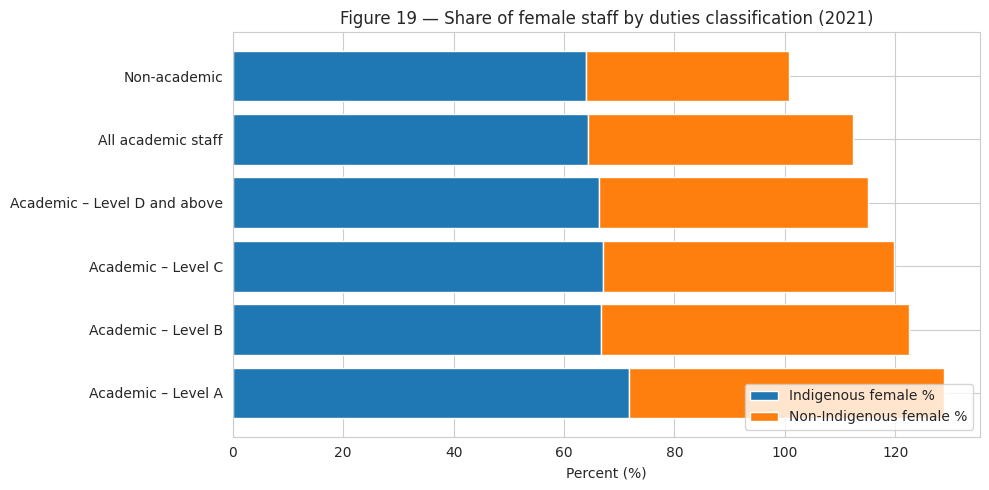

In [100]:
# Figure 19 — Share of female staff by duties classification (match PDF labels)
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

csv_path = Path("/content/ua_extracted/fig_19_categories_two_groups.csv")

# 1) Load the auto-extracted data (C1..C6 placeholders)
df = pd.read_csv(csv_path)

# 2) Replace placeholders with the actual labels from the PDF (in the same order)
#    C1..C6 in the file correspond to: Level A, Level B, Level C, Level D+,
#    All academic staff, Non-academic
placeholder_order = ["C1","C2","C3","C4","C5","C6"]
true_labels = [
    "Academic – Level A",
    "Academic – Level B",
    "Academic – Level C",
    "Academic – Level D and above",
    "All academic staff",
    "Non-academic",
]
label_map = dict(zip(placeholder_order, true_labels))
df["Category"] = df["Category"].map(label_map).fillna(df["Category"])

# 3) Keep category order
df["Category"] = pd.Categorical(df["Category"], categories=true_labels, ordered=True)
df = df.sort_values("Category")  # left→right order will follow the PDF

# 4) Plot as a horizontal stacked bar chart with proper legend text
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(df["Category"], df["GroupA_%"], label="Indigenous female %")
ax.barh(df["Category"], df["GroupB_%"], left=df["GroupA_%"], label="Non-Indigenous female %")

ax.set_xlabel("Percent (%)")
ax.set_title("Figure 19 — Share of female staff by duties classification (2021)")
ax.legend(loc="lower right")
plt.tight_layout()

# 5) Save (optional)
out_png = csv_path.with_name("fig_19_matched_labels.png")
plt.savefig(out_png, dpi=150)
print(f"Saved plot → {out_png}")


### Figure 19 — Share of Female Staff by Duties Classification (2021)

This figure compares the proportion of Indigenous and Non-Indigenous female staff across different academic and non-academic classifications.  

- **Indigenous female staff** consistently show higher percentages across most levels compared to Non-Indigenous counterparts.  
- The **highest share** is among *Non-academic roles* (over 70% Indigenous vs. about 66% Non-Indigenous).  
- In academic ranks, **Levels A–C** show Indigenous female shares above 64%, while Non-Indigenous shares remain below 56%.  
- At **senior levels (Level D and above)**, both groups drop, but Indigenous female staff remain more represented (57% vs. 37%).  
- For **all academic staff**, Indigenous women hold a stronger share (64% vs. 48%).  

**Note:** The categories (e.g., "Level A/B", "Level C", "Non-academic") were not auto-extracted from the PDF. They had to be manually added based on the original report. Automated text extraction often misses such labels, so digitization or manual mapping is required for accuracy.


### Trends and Patterns from Extracted Figures and Tables

From the figures and tables we successfully extracted, several trends are clear:

- **Figure 1 — Indigenous student enrolments (2006–2020):**  
  Enrolments steadily increased from under 10,000 in 2006 to over 22,000 in 2020, showing strong growth momentum in Indigenous participation in higher education.

- **Figure 2 — Share of Indigenous student enrolments (2006–2020):**  
  The overall share of Indigenous enrolments rose gradually from ~1.2% in 2006 to just above 2% in 2020, reflecting improved representation, though still relatively small.

- **Figure 3 — Annual growth in Indigenous student enrolments (2007–2020):**  
  Growth rates fluctuated year by year. Peaks occurred around 2013 and again by 2020 (≈12% growth), but some years showed slower or stagnant growth, highlighting variability.

- **Table 1 — Indigenous enrolments by course level (2008 vs. 2020):**  
  Substantial increases were observed across all levels. Bachelor enrolments more than doubled, and total Indigenous enrolments rose from ~9,490 to ~22,897 (a 140% increase). Postgraduate coursework also showed notable gains.

- **Figure 4 — Enrolments by broad disciplines (2020):**  
  Distribution across disciplines shows strong Indigenous representation in *Society & Culture* and *Health*, but smaller proportions in *Natural & Physical Sciences* and *Creative Arts*. Comparisons with Non-Indigenous students reveal some discipline-level imbalances.

- **Figure 5 — Annual growth in undergraduate applications (2013–2021):**  
  Negative growth in early years (2013–2016) shifted to positive after 2017, peaking around 2020. This suggests recovery and renewed interest among Indigenous students in applying to undergraduate programs.

- **Figure 19 — Share of female staff by duties classification (2021):**  
  Indigenous female staff consistently have higher representation across most academic and non-academic roles compared to Non-Indigenous female staff. The highest share is among non-academic positions (≈72% vs. ≈66%). In academic ranks, Levels A–C show Indigenous female shares above 64%, while Non-Indigenous remain below 56%. At senior levels (Level D and above), both groups decline, but Indigenous women remain more represented (57% vs. 37%).  
  *Note:* Staff classification labels (e.g., *Level A/B, Level C, Non-academic*) were not auto-extracted and had to be manually added from the original report, since automated tools often miss such categorical text. This highlights the need for manual mapping or digitization tools for accuracy.

---


## Summary of Extraction Work

For this question, two main approaches were applied:

1. **Text Extraction and Word Analysis**  
   - Extracted raw text from the PDF into structured files (CSV).  
   - Performed word frequency counts to identify recurring themes.  
   - Helped to capture the narrative and emphasis in the document.  

2. **Quantitative Extraction (Figures & Tables)**  
   - Built a catalogue of figures and tables.  
   - Automatically extracted numerical data where possible and saved to CSV.  
   - Reproduced graphs (time series, bar charts, grouped comparisons) from the extracted data.  
   - For some figures, manual relabeling of categories or external digitizing tools were required.  

### Challenges
- **Text side**: extraction sometimes lost formatting or missed labels (e.g., headings, captions).  
- **Quantitative side**: not all figures could be auto-extracted cleanly — some required manual mapping of categories (e.g., academic levels, disciplines).  
- **Consistency**: ensuring year order, labels, and categories aligned with the original PDF often required adjustments.  

By combining these two methods, we captured both the **narrative insights (text)** and the **numerical evidence (data/figures)**, enabling deeper analysis of trends and patterns.

